# Зависимость веса человека от его привычек в потреблении пищи прочих жизненных учловий

#### Имя Фамилия, вариант

# Аннотация
Почему некоторые люди имеют лишний вес, а другие нет? Что могла повлиять на то, какой вес сейчас имеет человек? Какие факторы помогают это определить? 
Данный датасет позволяет проанализировать и определить те самые причины, которые влияют на человеческий вес.

# Введение
Нашей задачей является при помощи разведочного анализа, установить, как зависит вес человека от его привычек в потреблении пищи и прочих жизненных условий.

Набор данных представляет собой данные анкеты, в которой опрашивали студентов Mercyhurst University на предмет их кулинарых предпочтений и образа жизни в целом. Набор содержит 113 наблюдений и 31 переменную, среди которых такие, как пол, частота употребления тех или иных продуктов, частота приготовления блюд дома, любимая кухня и др.

# Подготовка данных к анализу
Подключение используемых бибилиотек

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Загрузка датасета

In [147]:
df = pd.read_csv('food_coded.csv')

In [148]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


Просмотр всех признаков(столбцов)

In [149]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

График, где видно,сколько пропущенных данных в датасете

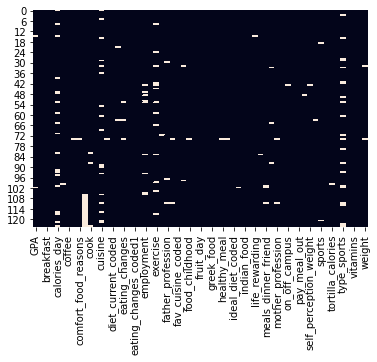

In [150]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Информация о типах данных в датасете

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

Сумма всех пропусков

In [152]:
df.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         21
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [153]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
for i in cols_with_missing:
    print(i,df[i].isnull().sum())

GPA 2
calories_day 19
calories_scone 1
comfort_food 1
comfort_food_reasons 1
comfort_food_reasons_coded 19
cook 3
cuisine 17
diet_current 1
drink 2
eating_changes 3
employment 9
exercise 13
father_education 1
father_profession 3
fav_cuisine 2
fav_food 2
food_childhood 1
healthy_meal 1
ideal_diet 1
income 1
life_rewarding 1
marital_status 1
meals_dinner_friend 3
mother_education 3
mother_profession 2
on_off_campus 1
persian_food 1
self_perception_weight 1
soup 1
sports 2
tortilla_calories 1
type_sports 21
weight 2


Заполнение пропрупсков вручную. Для каждого признака подобраны значения, которые соответсвуют только ему.

In [154]:
df['calories_day'].fillna(1,inplace=True)
df['comfort_food_reasons_coded'].fillna(9,inplace=True)
df['cuisine'].fillna(6,inplace=True)
df['employment'].fillna(4,inplace=True)
df['exercise'].fillna(5,inplace=True)
df['type_sports'].fillna('Nothing',inplace=True)

In [155]:
for i in cols_with_missing:
    df = df[~df[i].isnull()]

Изменения типа данных для некоторых столбоц,с целью большей гибкости с данными.

In [156]:
df['GPA'].value_counts()
df.dropna(subset=['GPA'],inplace=True)
df['GPA_new'] = df['GPA'].str.replace(".","")
df = df[~df['GPA_new'].str.isdigit() == False]
df['GPA'] = df['GPA'].astype(float)
df.drop('GPA_new',axis=1,inplace=True)

In [157]:
df['calories_day'] = df['calories_day'].astype(int)
df['calories_scone'] = df['calories_scone'].astype(int)
df['life_rewarding'] = df['life_rewarding'].astype(int)
df['marital_status'] = df['marital_status'].astype(int)
df['mother_education'] = df['mother_education'].astype(int)
df['on_off_campus'] = df['on_off_campus'].astype(int)
df['persian_food'] = df['persian_food'].astype(int)
df['self_perception_weight'] = df['self_perception_weight'].astype(int)
df['soup'] = df['soup'].astype(int)
df['sports'] = df['sports'].astype(int)
df['tortilla_calories'] = df['tortilla_calories'].astype(int)


Проверка данных, после устранения пропущенных данных.

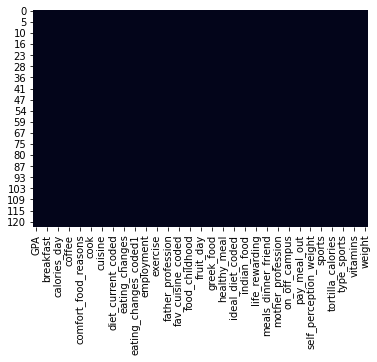

In [158]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Преобразую текстовые данные в числовые

In [159]:
df['weight'] = df['weight'].str.replace(r'[^\d\d\d]', '').replace('', np.nan).astype(float)

# Разведочный анализ данных

In [160]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,1,315,1,none,we dont have comfort,9.0,...,1,1,1,1165,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3,420,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1,1,2,725,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4,420,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1,2,5,1165,500,none,5,1,900,NaN
3,3.200,1,1,430,3,420,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1,2,5,725,690,Nothing,3,1,1315,240.0
4,3.500,1,1,720,2,420,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1,1,4,940,500,Softball,4,2,760,190.0


/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



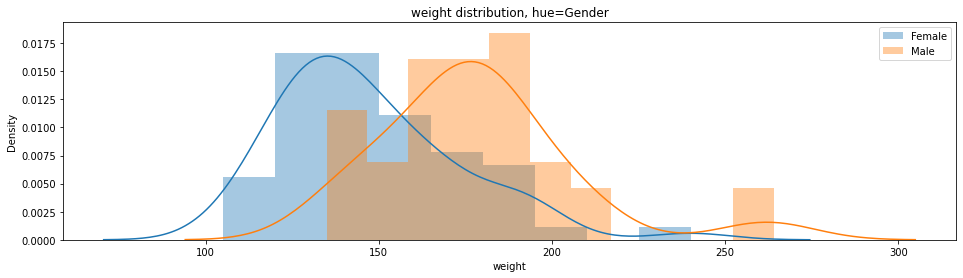

In [161]:
weight_mean = {}
weight_std = {}

fig, ax = plt.subplots(figsize=[16,4])

for gen, frame in df[['Gender', 'weight']].dropna().groupby('Gender'):
    weight_mean[gen] = frame['weight'].values.mean()
    weight_std[gen] = frame['weight'].values.std()
    sex_dict = {1: 0, 2: 1}
    sns.distplot(frame['weight'], ax=ax, label=['Female', 'Male'][sex_dict[gen]])

ax.set_title('weight distribution, hue=Gender')
ax.legend()

Из данного графика видно, мужчины имеют проблемы с избытком веса больше, чем женщины. Рассмотрим дальше, почему это так

In [162]:
df = df.sort_values('weight')

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Weight dependence on the cuisine')

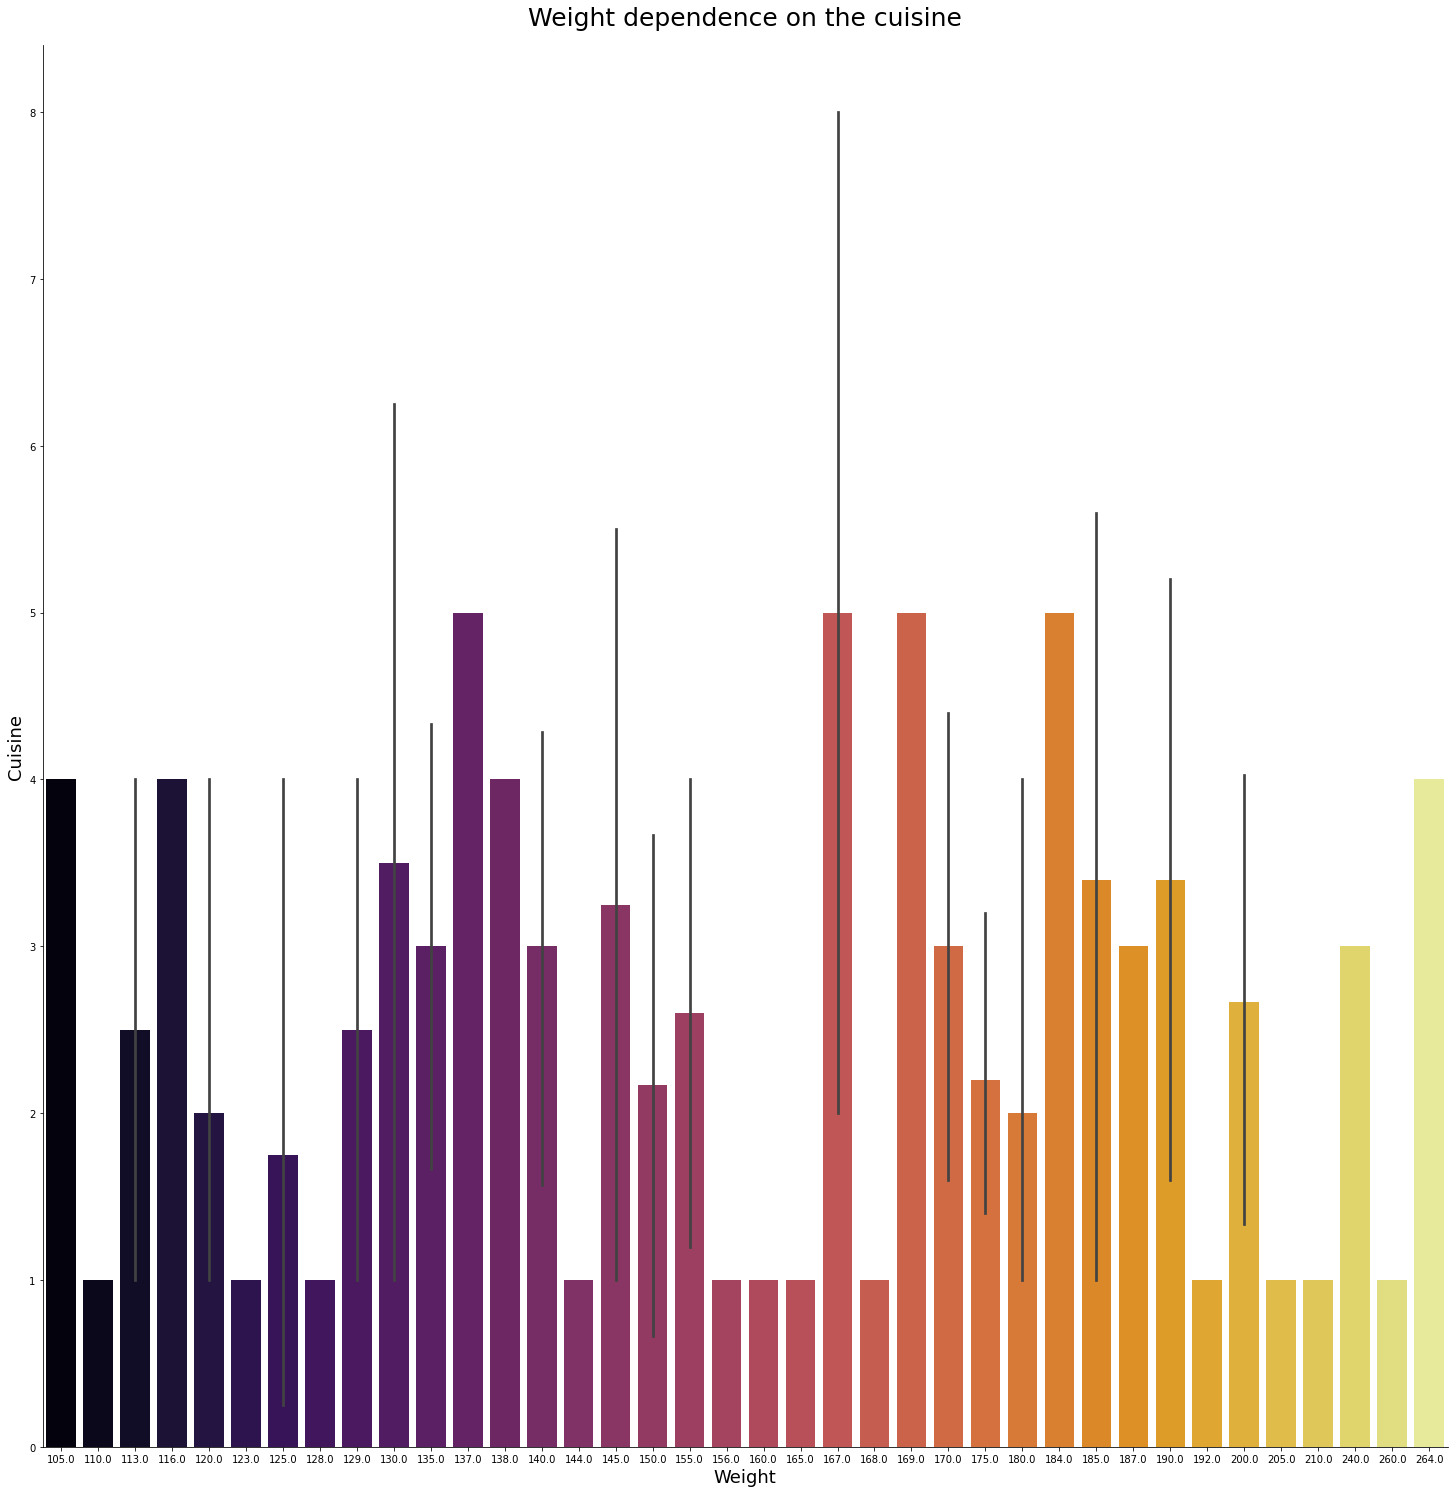

In [163]:
sns.factorplot(x='weight', y='fav_cuisine_coded', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Cuisine', fontsize=18)
plt.title('Weight dependence on the cuisine', y=1.01, size=25)


> <p>0-none</p>
> <p>1 – Italian/French/Greek</p>
> <p>2 – Spanish/Mexican</p>
> <p>3 – Arabic/Turkish</p>
> <p>4 – Asian/Chinese/Thai/Nepal</p>
> <p>5 – American</p>
> <p>6 – African</p>
> <p>7 – Jamaican</p>
> <p>8 – indian</p>

Таким образом,людивесившие больше всего отдают предпочтение итальянской, французской, греческой, китайской, азиатской, терецкой и арабийской кухне

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Weight dependence on the healthy_feeling')

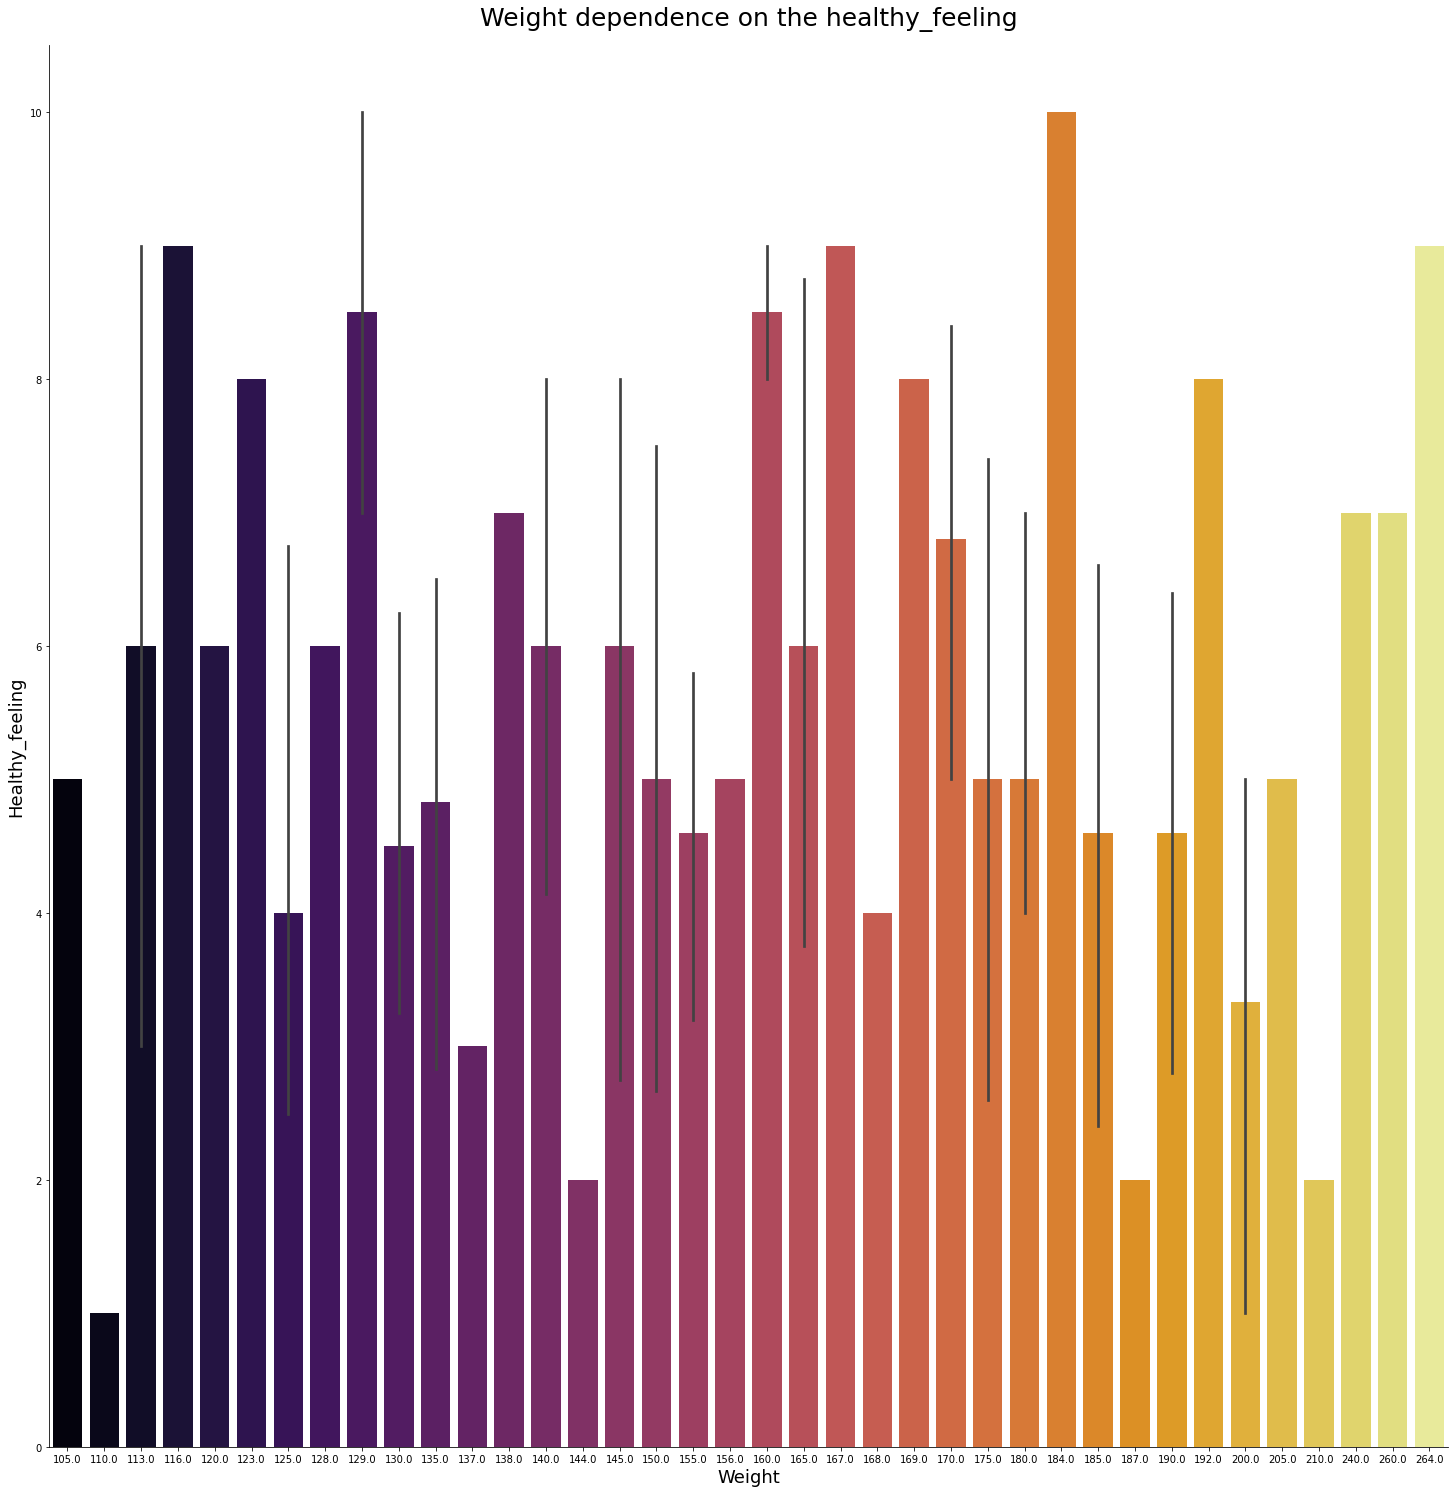

In [164]:
sns.factorplot(x='weight', y='healthy_feeling', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Healthy_feeling', fontsize=18)
plt.title('Weight dependence on the healthy_feeling', y=1.01, size=25)

> <p>1 - полное согласие</p>
> <p>10 - полное несогласие</p>


Из данного графика, нельзя сделать вывод о зависимости фактора - чувство себяздоровым, от веса,но можно увидеть, что большинство людей ощущают себя нездоровыми при избытке веса 

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of employment on weight')

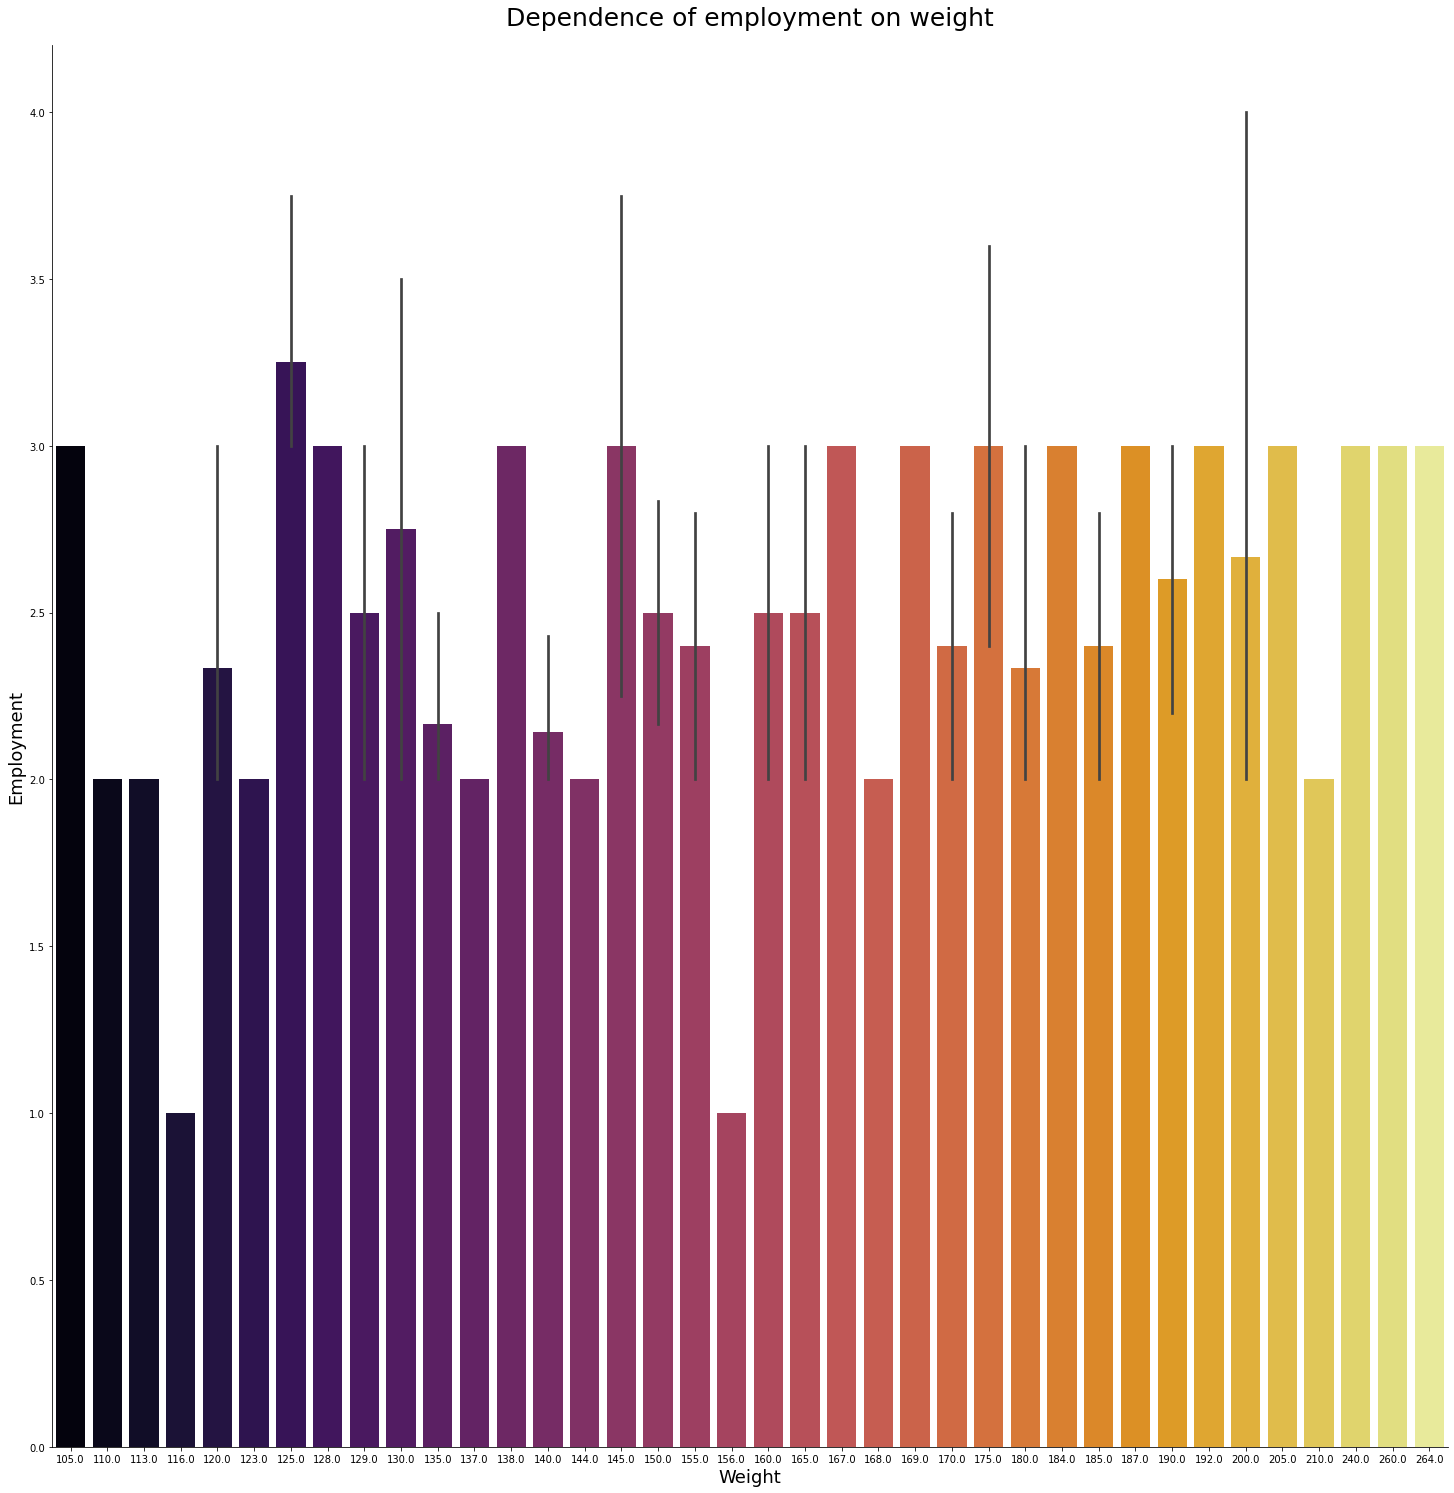

In [127]:
sns.factorplot(x='weight', y='employment', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Employment', fontsize=18)
plt.title('Dependence of employment on weight', y=1.01, size=25)

> <p>1 - full time</p>
> <p>2 - part time</p>
> <p>3 - no</p>
> <p>4 - other</p>


Большинство людей с лишним весом практически не заняты работой

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of self perception weight on weight')

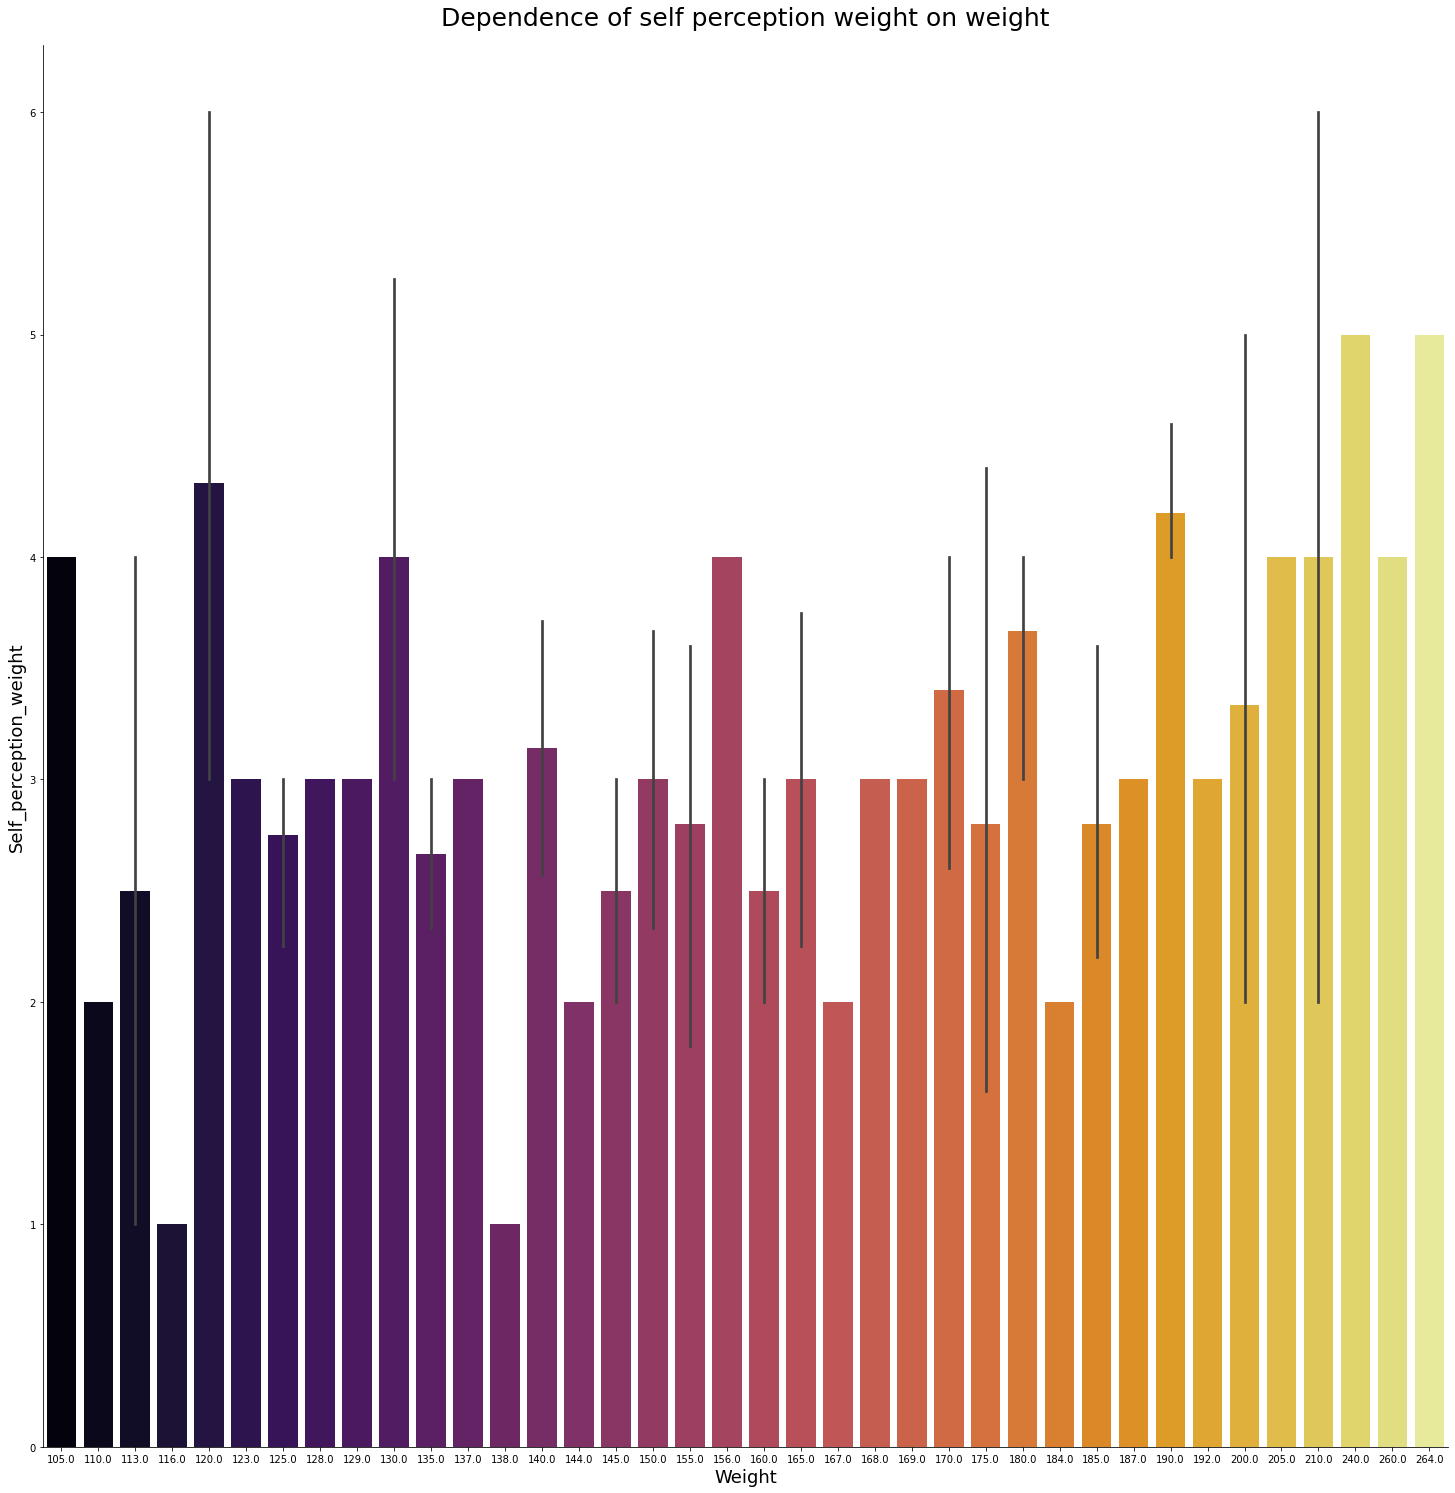

In [128]:
sns.factorplot(x='weight', y='self_perception_weight', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Self_perception_weight', fontsize=18)
plt.title('Dependence of self perception weight on weight', y=1.01, size=25)

In [130]:
women = df[df.Gender == 1]
men = df[df.Gender == 2]

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of self perception weight on weight women')

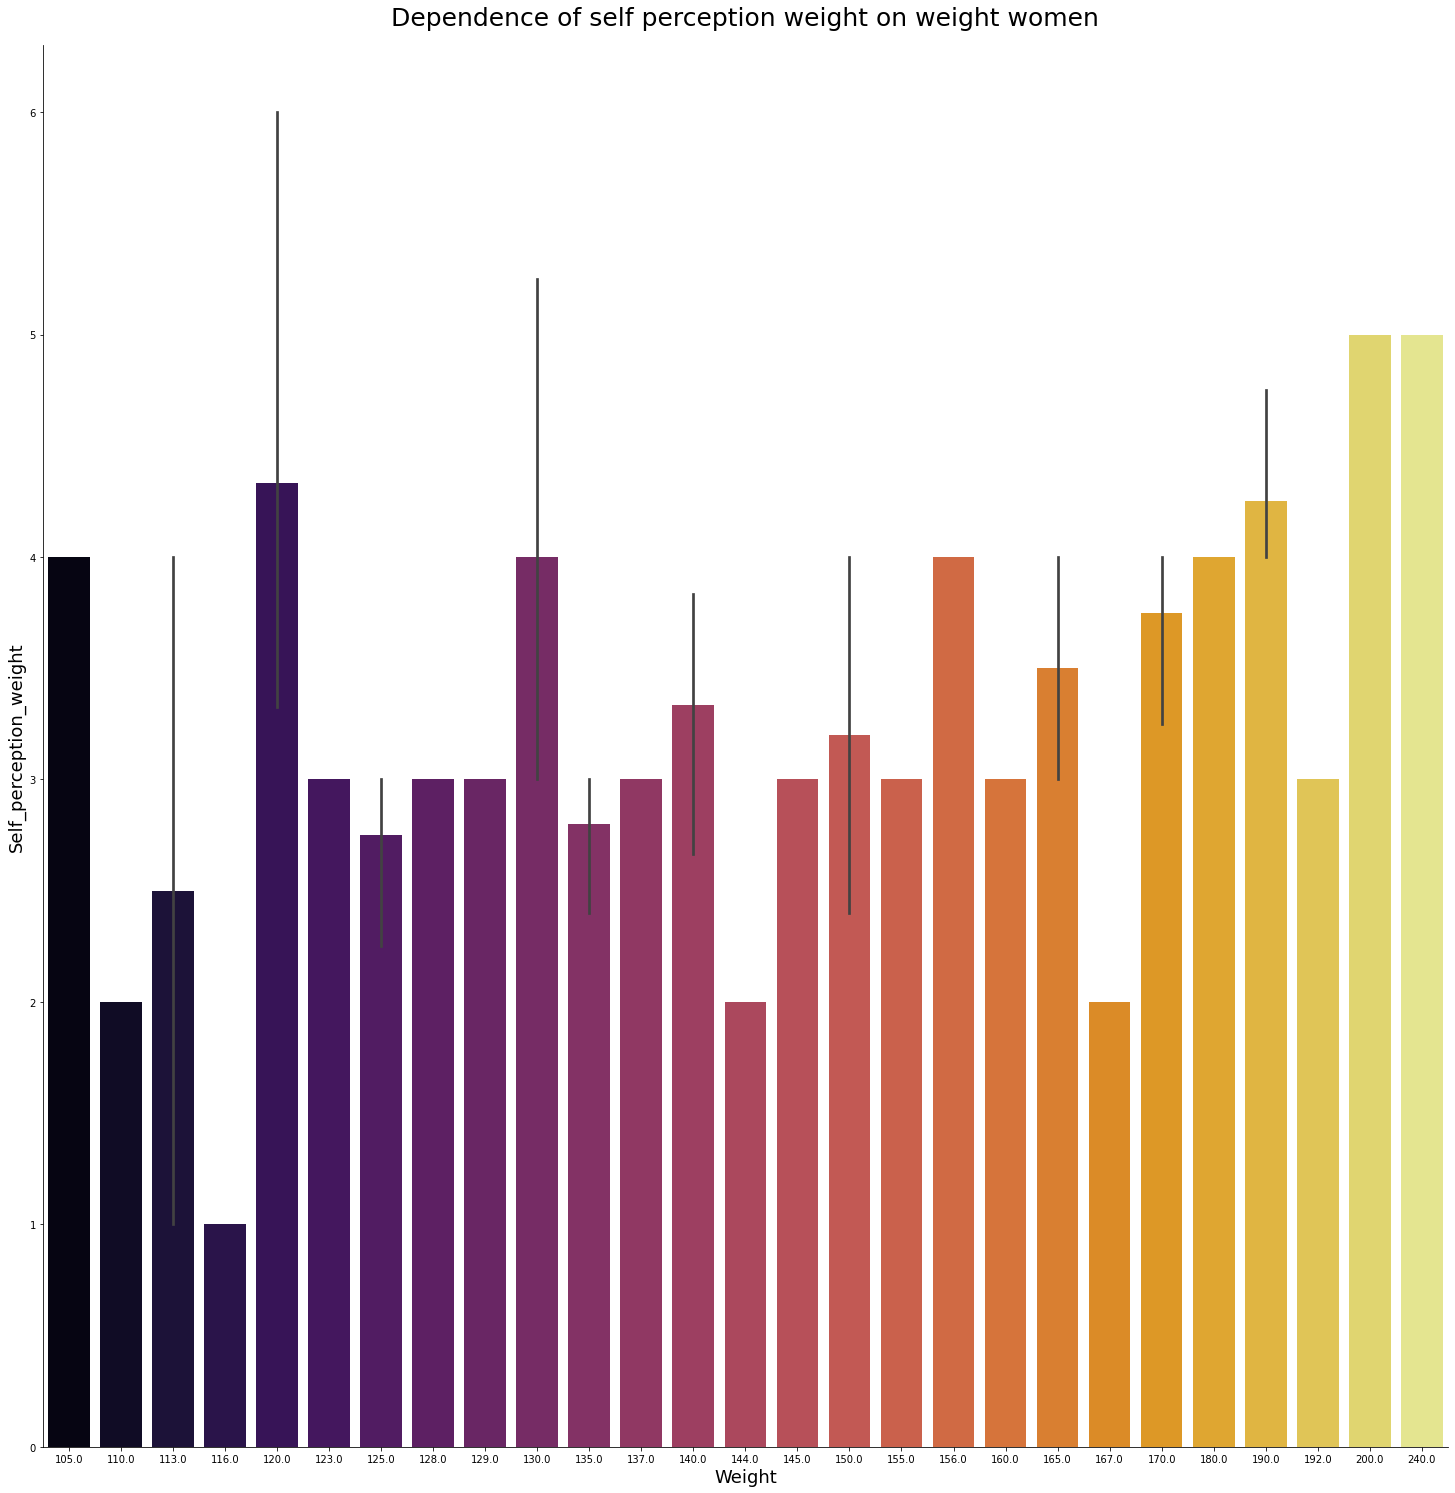

In [131]:
sns.factorplot(x='weight', y='self_perception_weight', data=women, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Self_perception_weight', fontsize=18)
plt.title('Dependence of self perception weight on weight women', y=1.01, size=25)

> <p>6 - i dont think myself in these terms</p>
> <p>5 - overweight</p>
> <p>4 - slightly overweight </p>
> <p>3 - just right</p>
> <p>2 - very fit</p>
> <p>1 - slim</p>

Большинство женщин с избытком веса считают, что они они имеют лишний вес, но совсем в небольшом количестве

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of self perception weight on weight men')

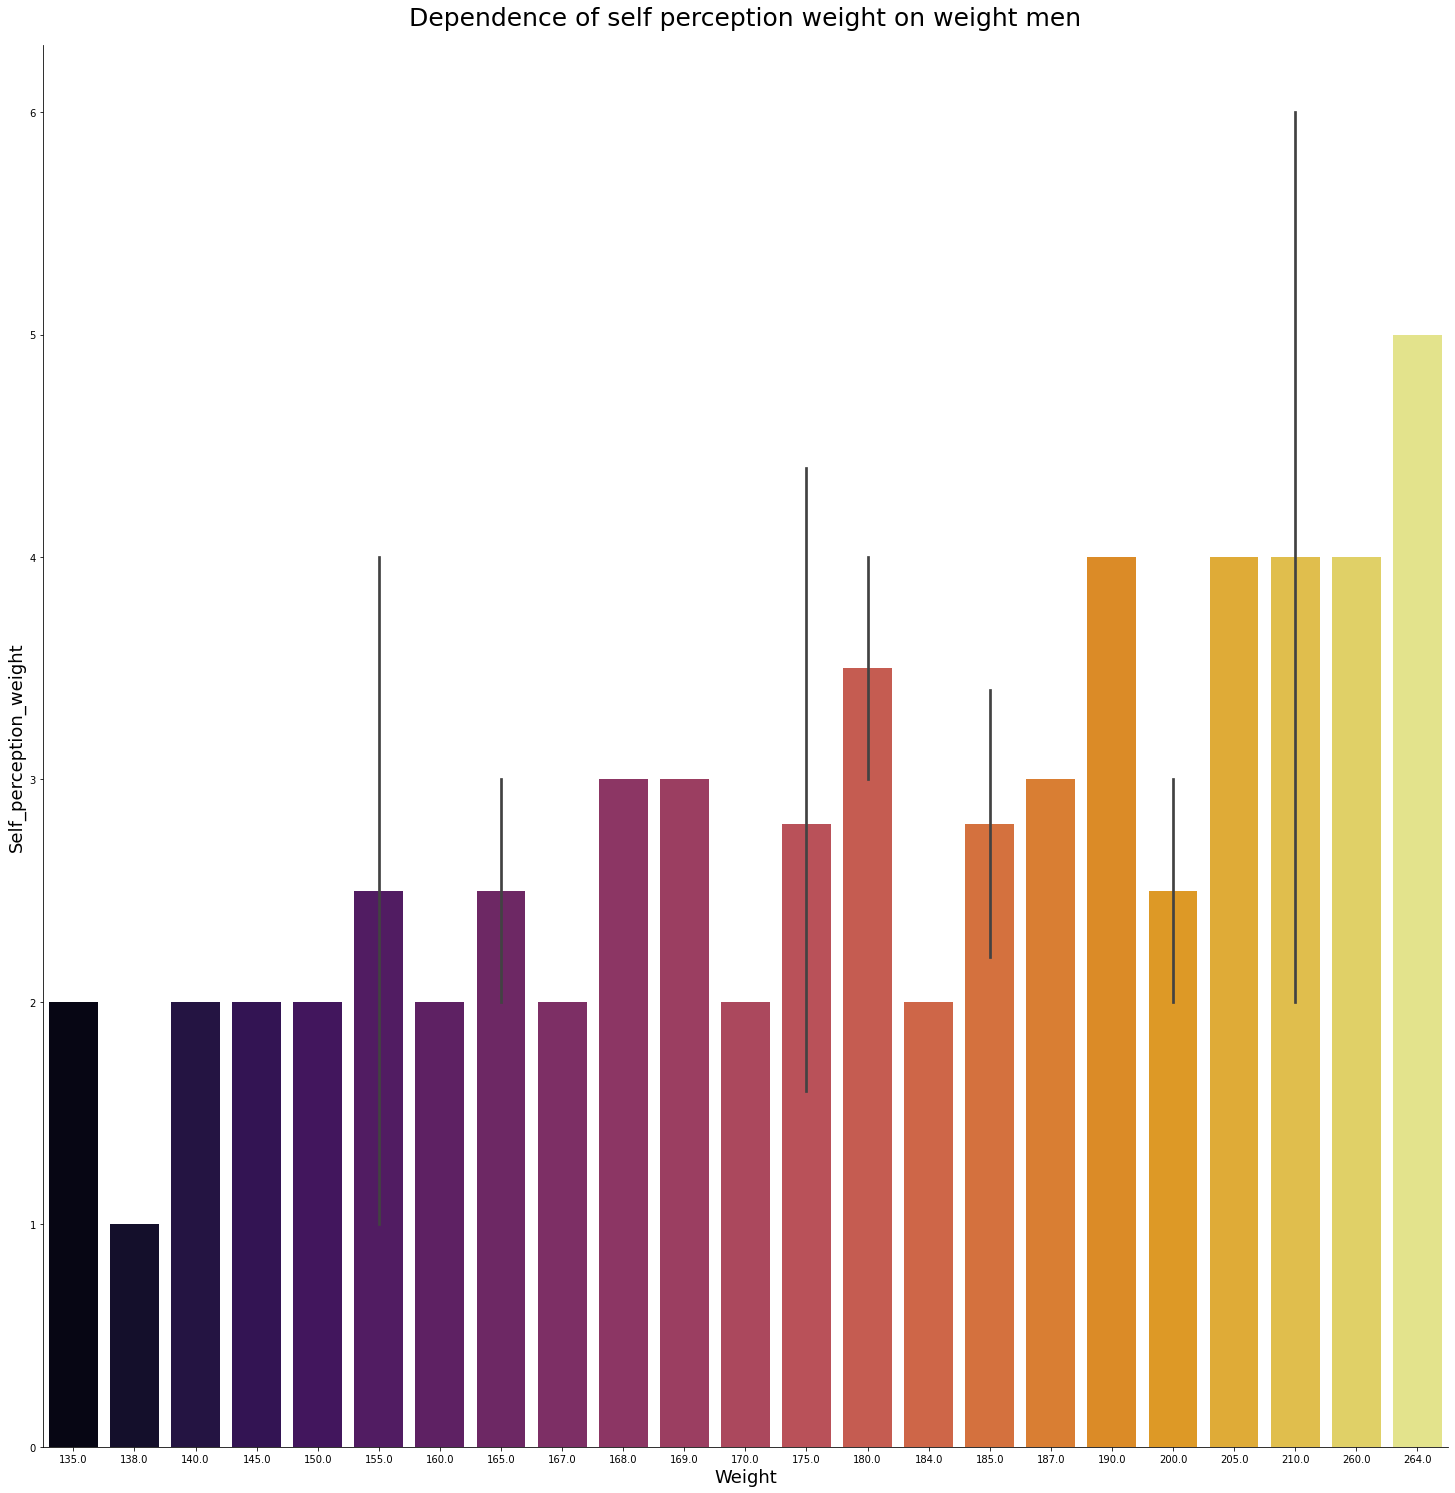

In [132]:
sns.factorplot(x='weight', y='self_perception_weight', data=men, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Self_perception_weight', fontsize=18)
plt.title('Dependence of self perception weight on weight men', y=1.01, size=25)

> <p>6 - i dont think myself in these terms</p>
> <p>5 - overweight</p>
> <p>4 - slightly overweight </p>
> <p>3 - just right</p>
> <p>2 - very fit</p>
> <p>1 - slim</p>

Мужчины с избытком веса,считают, что они худые и не принимают во внимание их фактический вес. Лишь мужчины, весящие более 190 кг, понимают, что их вес очень большой

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of marital status on weight')

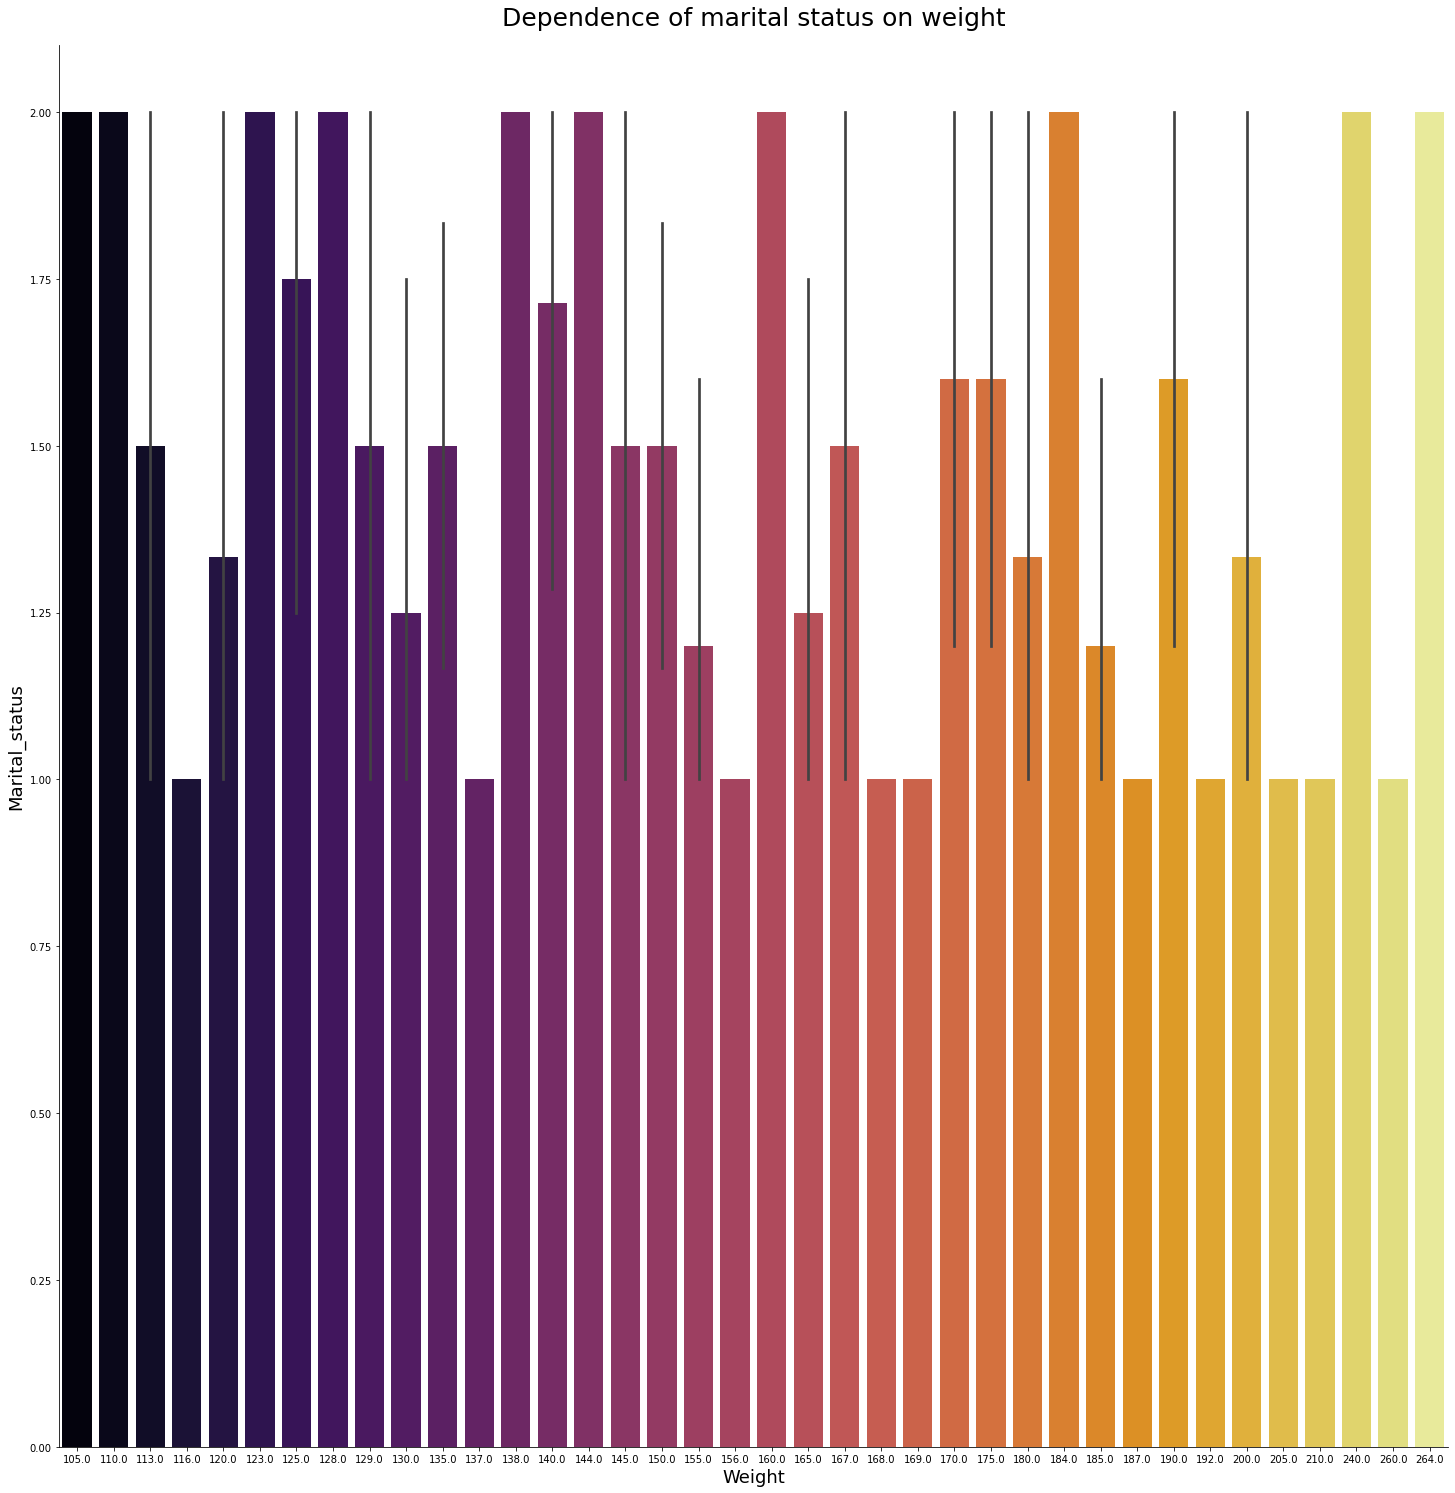

In [133]:
sns.factorplot(x='weight', y='marital_status', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Marital_status', fontsize=18)
plt.title('Dependence of marital status on weight', y=1.01, size=25)

> <p>1 - Single</p>
> <p>2 - In a relationship</p>
> <p>3 - Cohabiting </p>
> <p>4 - Married</p>
> <p>5 - Divorced</p>
> <p>6 - Widowed</p>

Из данного графика видно, что в основном, люди с лишним весом одиноки, либо находятся вотношениях. Данный фактор связан с трендом на худой вес в 21 веке.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of marital status on weight women')

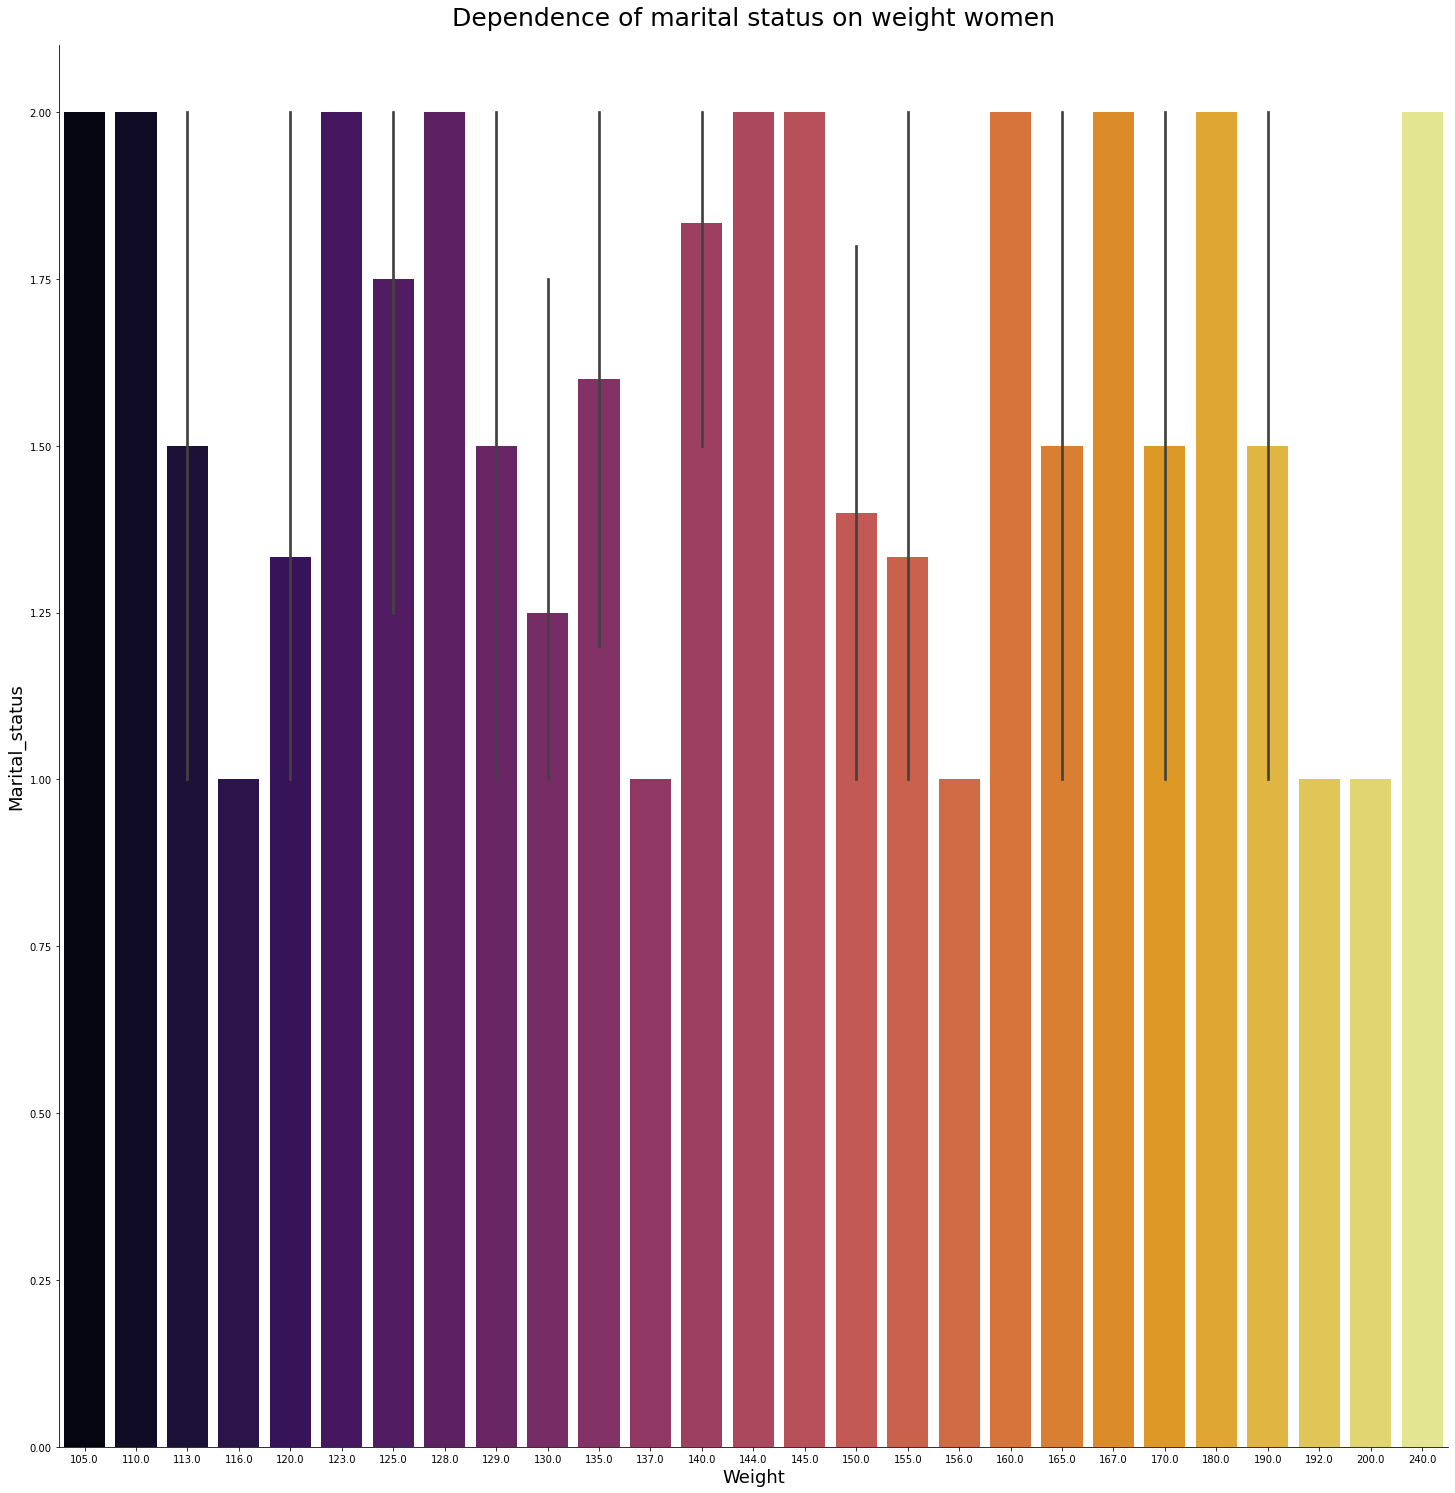

In [134]:
sns.factorplot(x='weight', y='marital_status', data=women, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Marital_status', fontsize=18)
plt.title('Dependence of marital status on weight women', y=1.01, size=25)

> <p>1 - Single</p>
> <p>2 - In a relationship</p>
> <p>3 - Cohabiting </p>
> <p>4 - Married</p>
> <p>5 - Divorced</p>
> <p>6 - Widowed</p>

У женщин нет какого то приемущества с общим графиком. Примрено одинаковое распределение женщин одиноких, либо в отношениях.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of marital status on weight men')

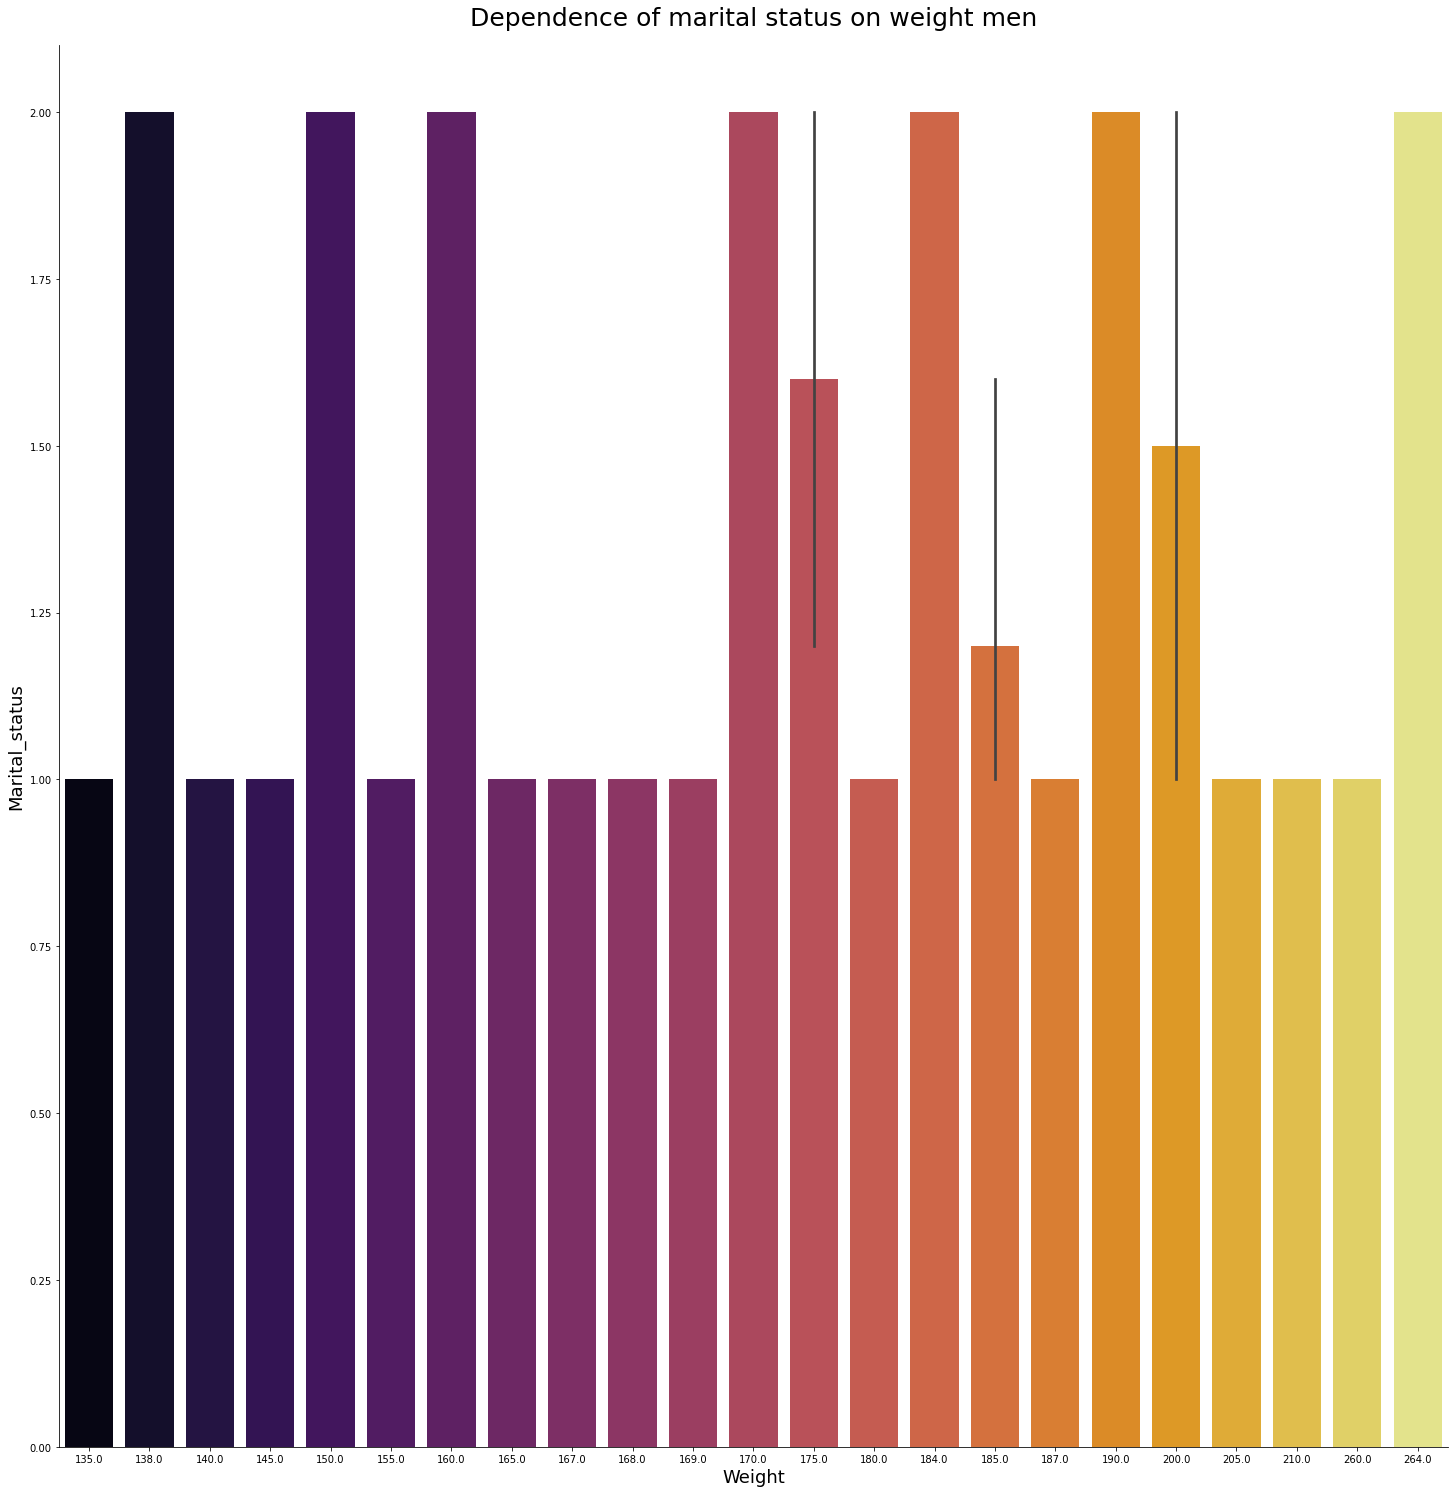

In [135]:
sns.factorplot(x='weight', y='marital_status', data=men, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Marital_status', fontsize=18)
plt.title('Dependence of marital status on weight men', y=1.01, size=25)

> <p>1 - Single</p>
> <p>2 - In a relationship</p>
> <p>3 - Cohabiting </p>
> <p>4 - Married</p>
> <p>5 - Divorced</p>
> <p>6 - Widowed</p>

Абсолютное большинство мужчин с лишним весом  одиноки и не имеют никаких отношений.


/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of location on weight')

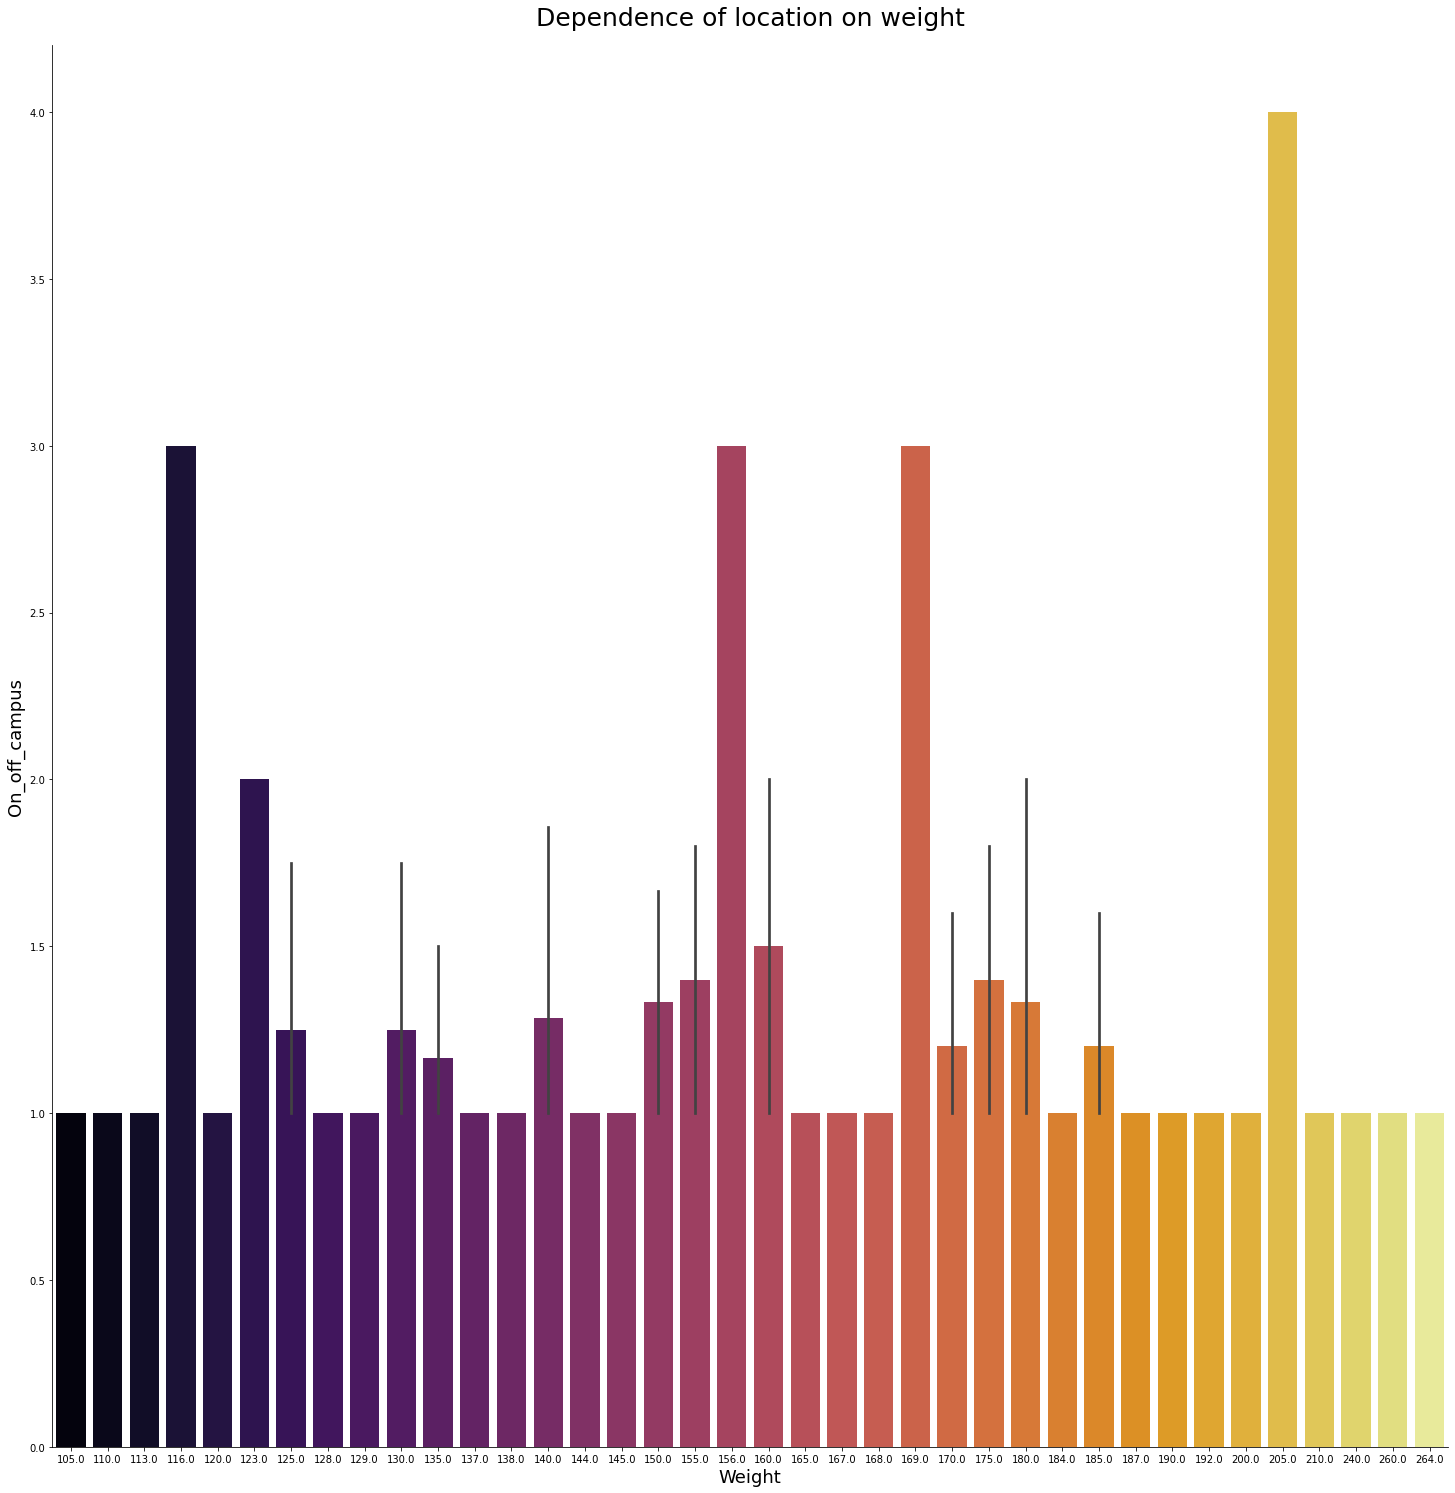

In [136]:
sns.factorplot(x='weight', y='on_off_campus', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('On_off_campus', fontsize=18)
plt.title('Dependence of location on weight', y=1.01, size=25)

> <p>1 - On campus</p>
> <p>2 - Rent out of campus</p>
> <p>3 - Live with my parents and commute </p>
> <p>4 - Own my own house</p>

Большинство людей с лишним весом проживают в кампусе.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of income on weight')

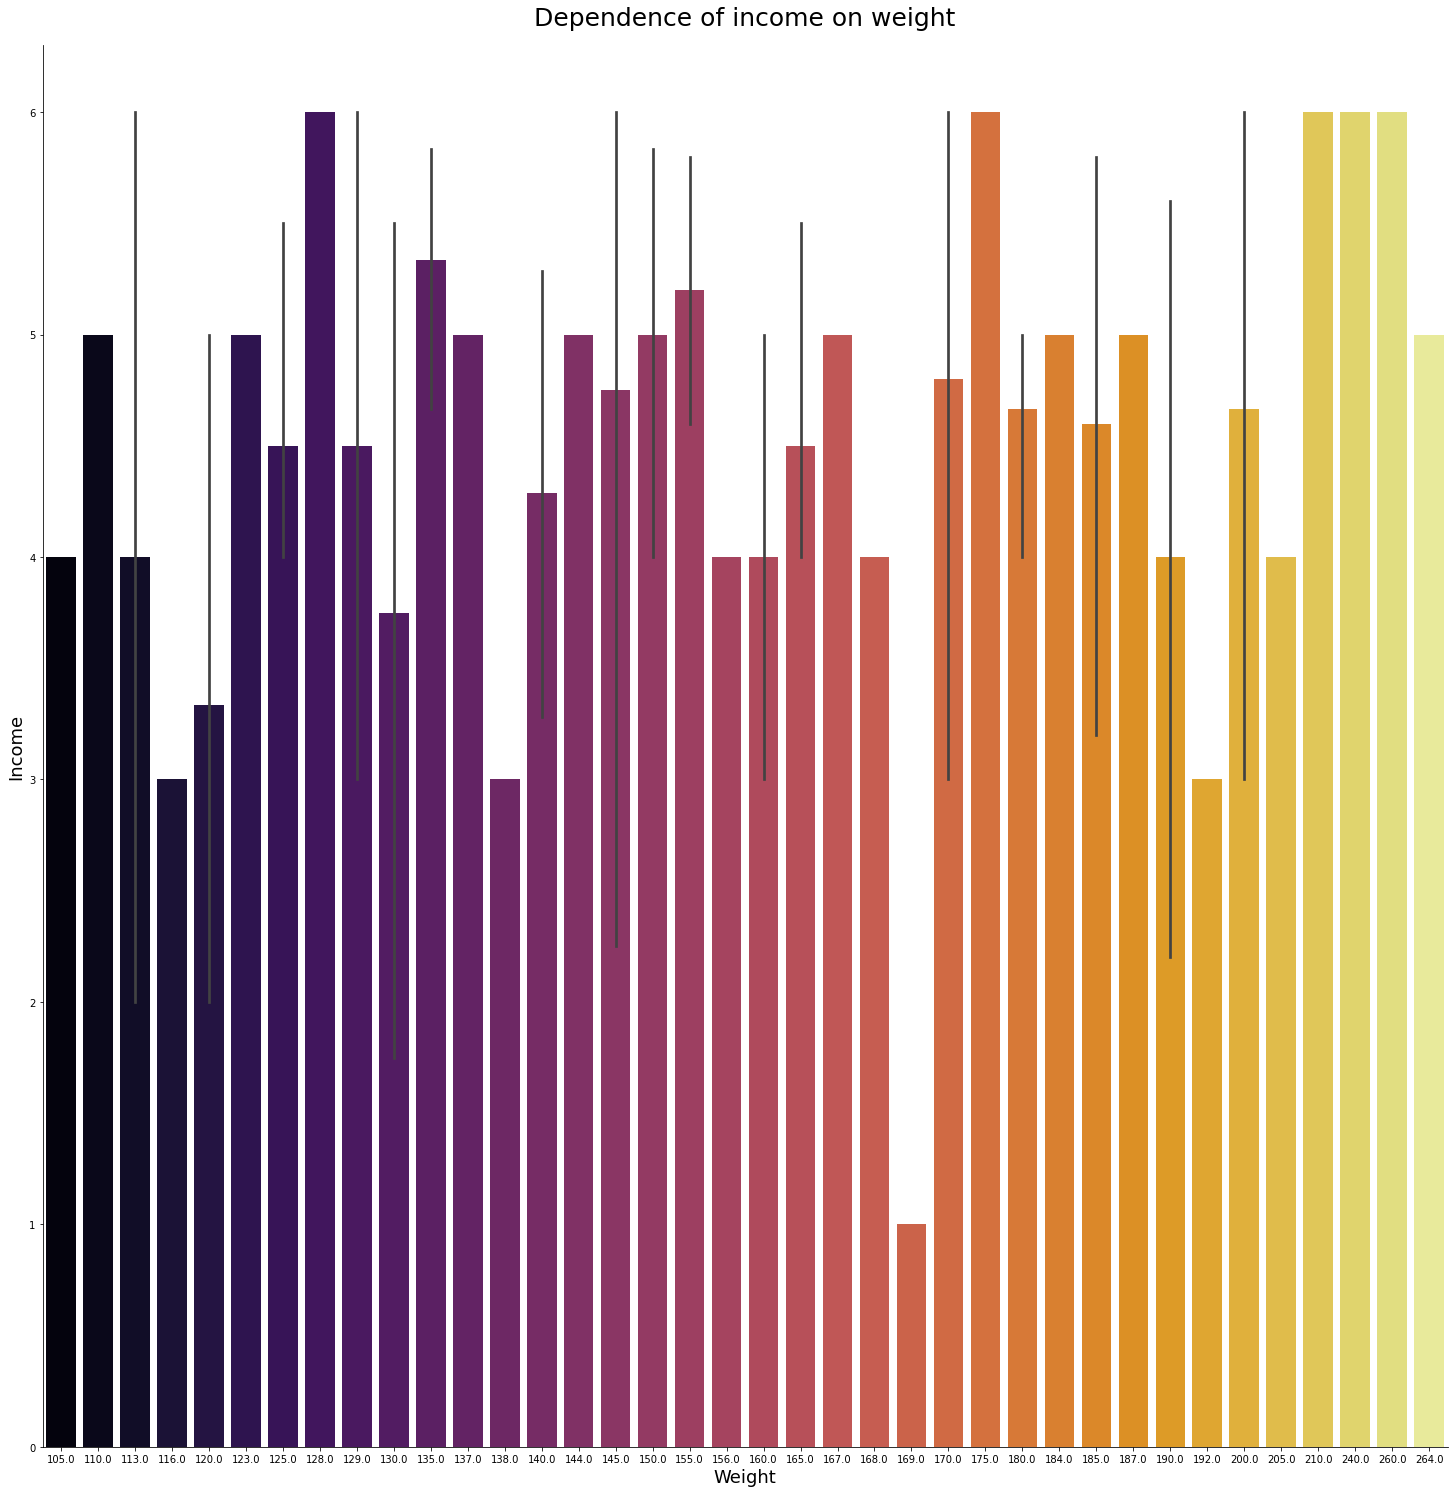

In [137]:
sns.factorplot(x='weight', y='income', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.title('Dependence of income on weight', y=1.01, size=25)


> <p>1 - less than 15,000</p>
> <p>2 - 15,001 to 30,000</p>
> <p>3 - 30,001 to 50,000</p>
> <p>4 - 50,001 to 70,000 </p>
> <p>5 - 70,001 to 100,000</p>
> <p>6 - higher than 100,000</p>

Данный график показывает, зависимость веса от заработка человека. МОжно сделать очевидный вывод,что людислишним весом, зарабатывают довольно большие суммы в год, начиная от 50000 долларов в год. 

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of eating changes coded on weight')

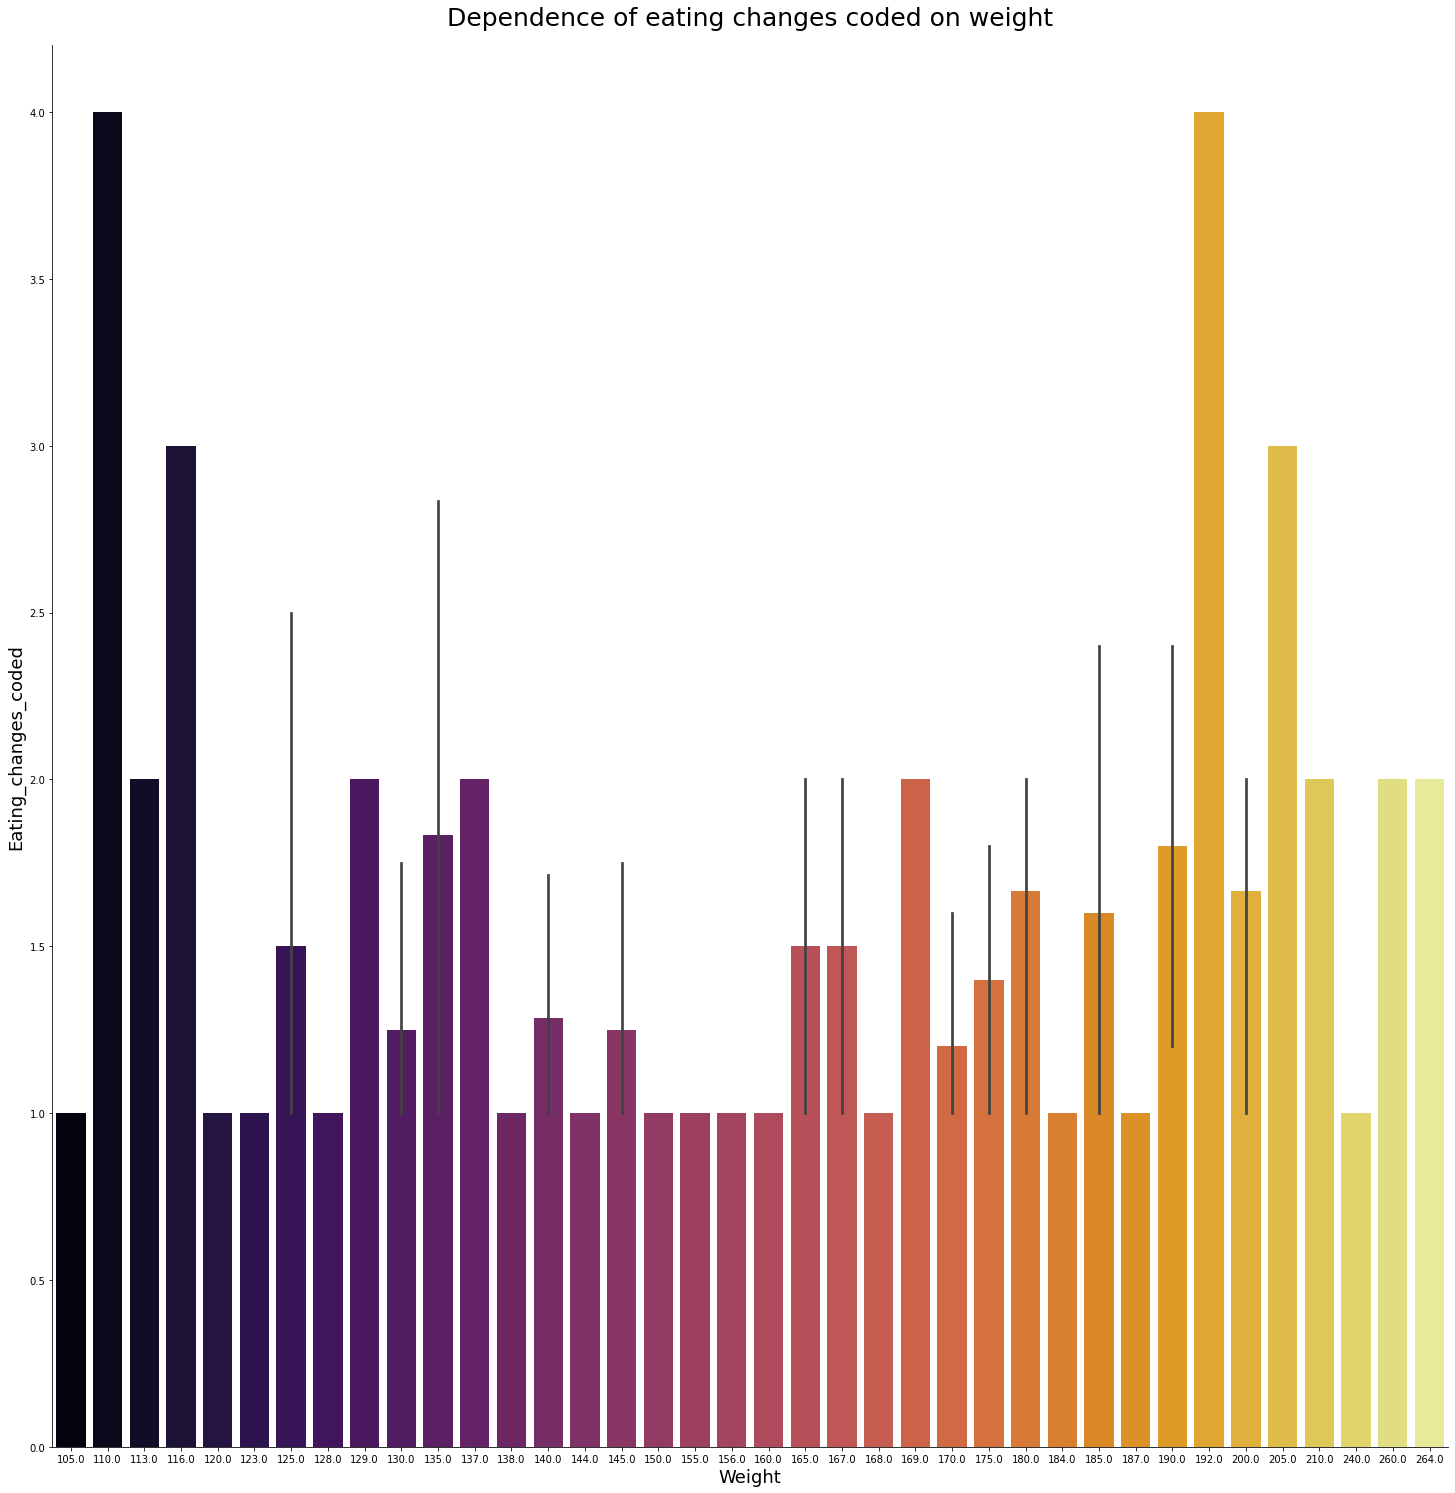

In [138]:
sns.factorplot(x='weight', y='eating_changes_coded', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Eating_changes_coded', fontsize=18)
plt.title('Dependence of eating changes coded on weight', y=1.01, size=25)

> <p>1 – worse</p>
> <p>2 – better</p>
> <p>3 – the same</p>
> <p>4 – unclear</p>

Из графика видно, что изменения в манере потребления пищи с момента поступления в университет у большинства людей с лишним весом стала хуже.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of exercise on weight')

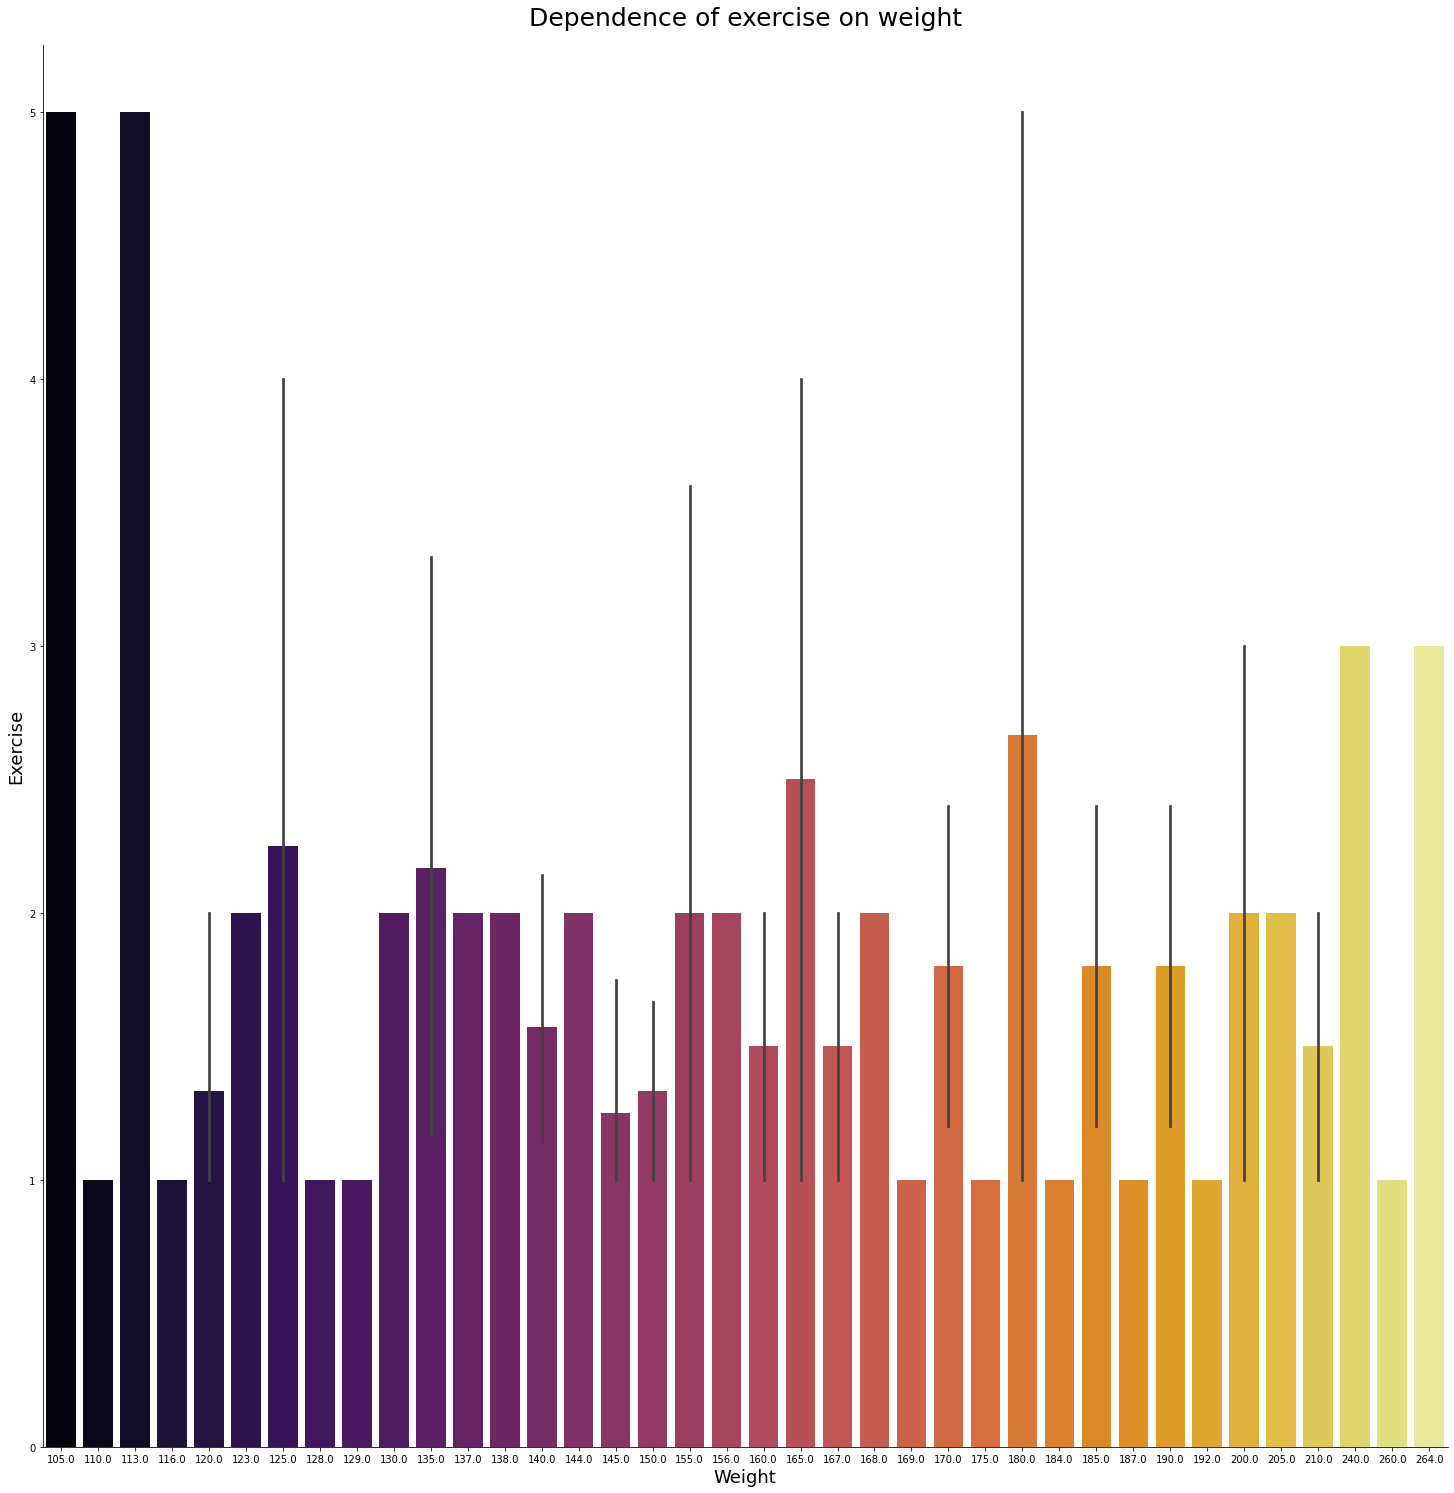

In [139]:
sns.factorplot(x='weight', y='exercise', data=df, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Exercise', fontsize=18)
plt.title('Dependence of exercise on weight', y=1.01, size=25)

> <p>1 - Everyday</p> 
> <p>2 - Twice or three times per week</p> 
> <p>3 - Once a week</p>
> <p>4 - Sometimes</p> 
> <p>5 – Never</p>

Большинство людей слишним весом занимаются спортом каждый день, либо дважды или трижды день, что очень странный результат.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of exercise on weight women')

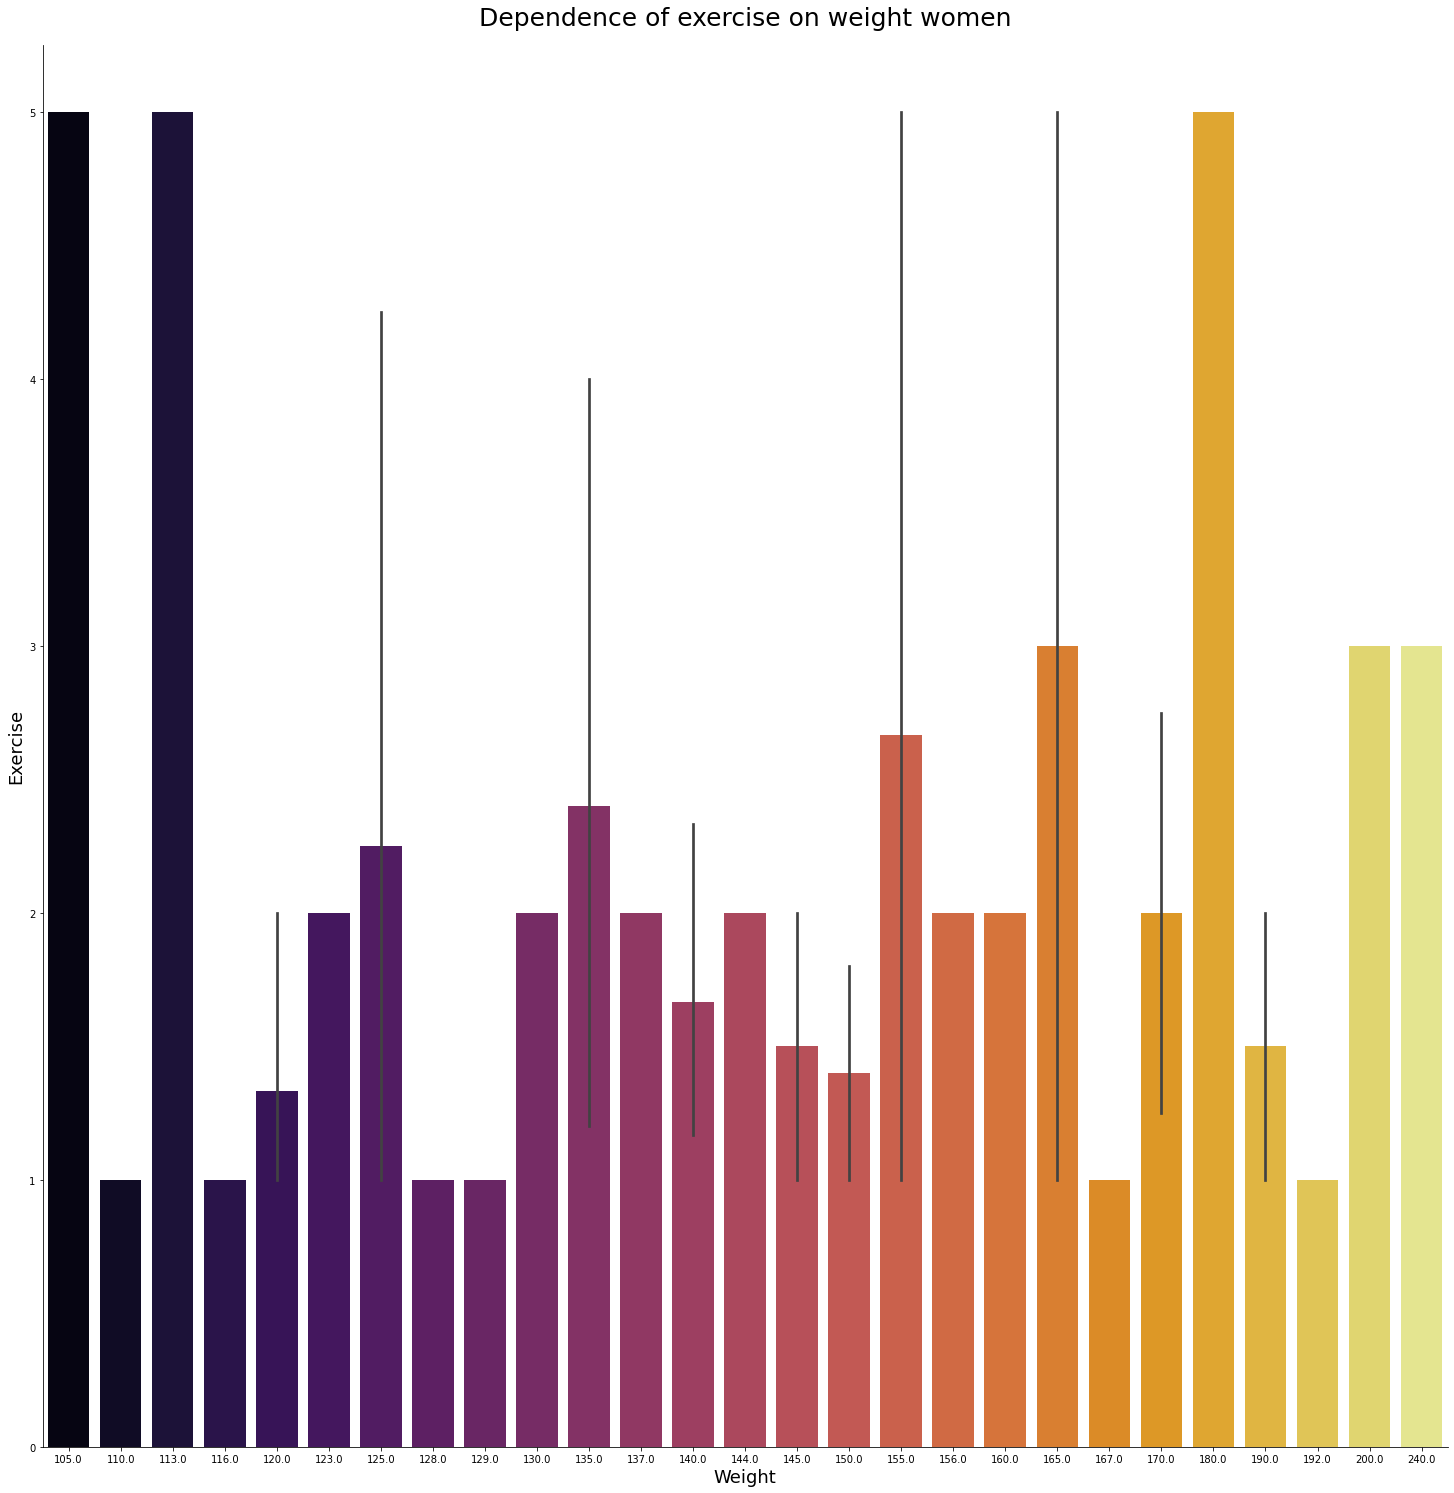

In [140]:
sns.factorplot(x='weight', y='exercise', data=women, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Exercise', fontsize=18)
plt.title('Dependence of exercise on weight women', y=1.01, size=25)


> <p>1 - Everyday</p> 
> <p>2 - Twice or three times per week</p> 
> <p>3 - Once a week</p>
> <p>4 - Sometimes</p> 
> <p>5 – Never</p>

У женщин распредление не поменялось. Большинство,также занимается спортом каждый день, либо 2 или 3 раза в неделю.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/home/jigsaw/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.01, 'Dependence of exercise on weight men')

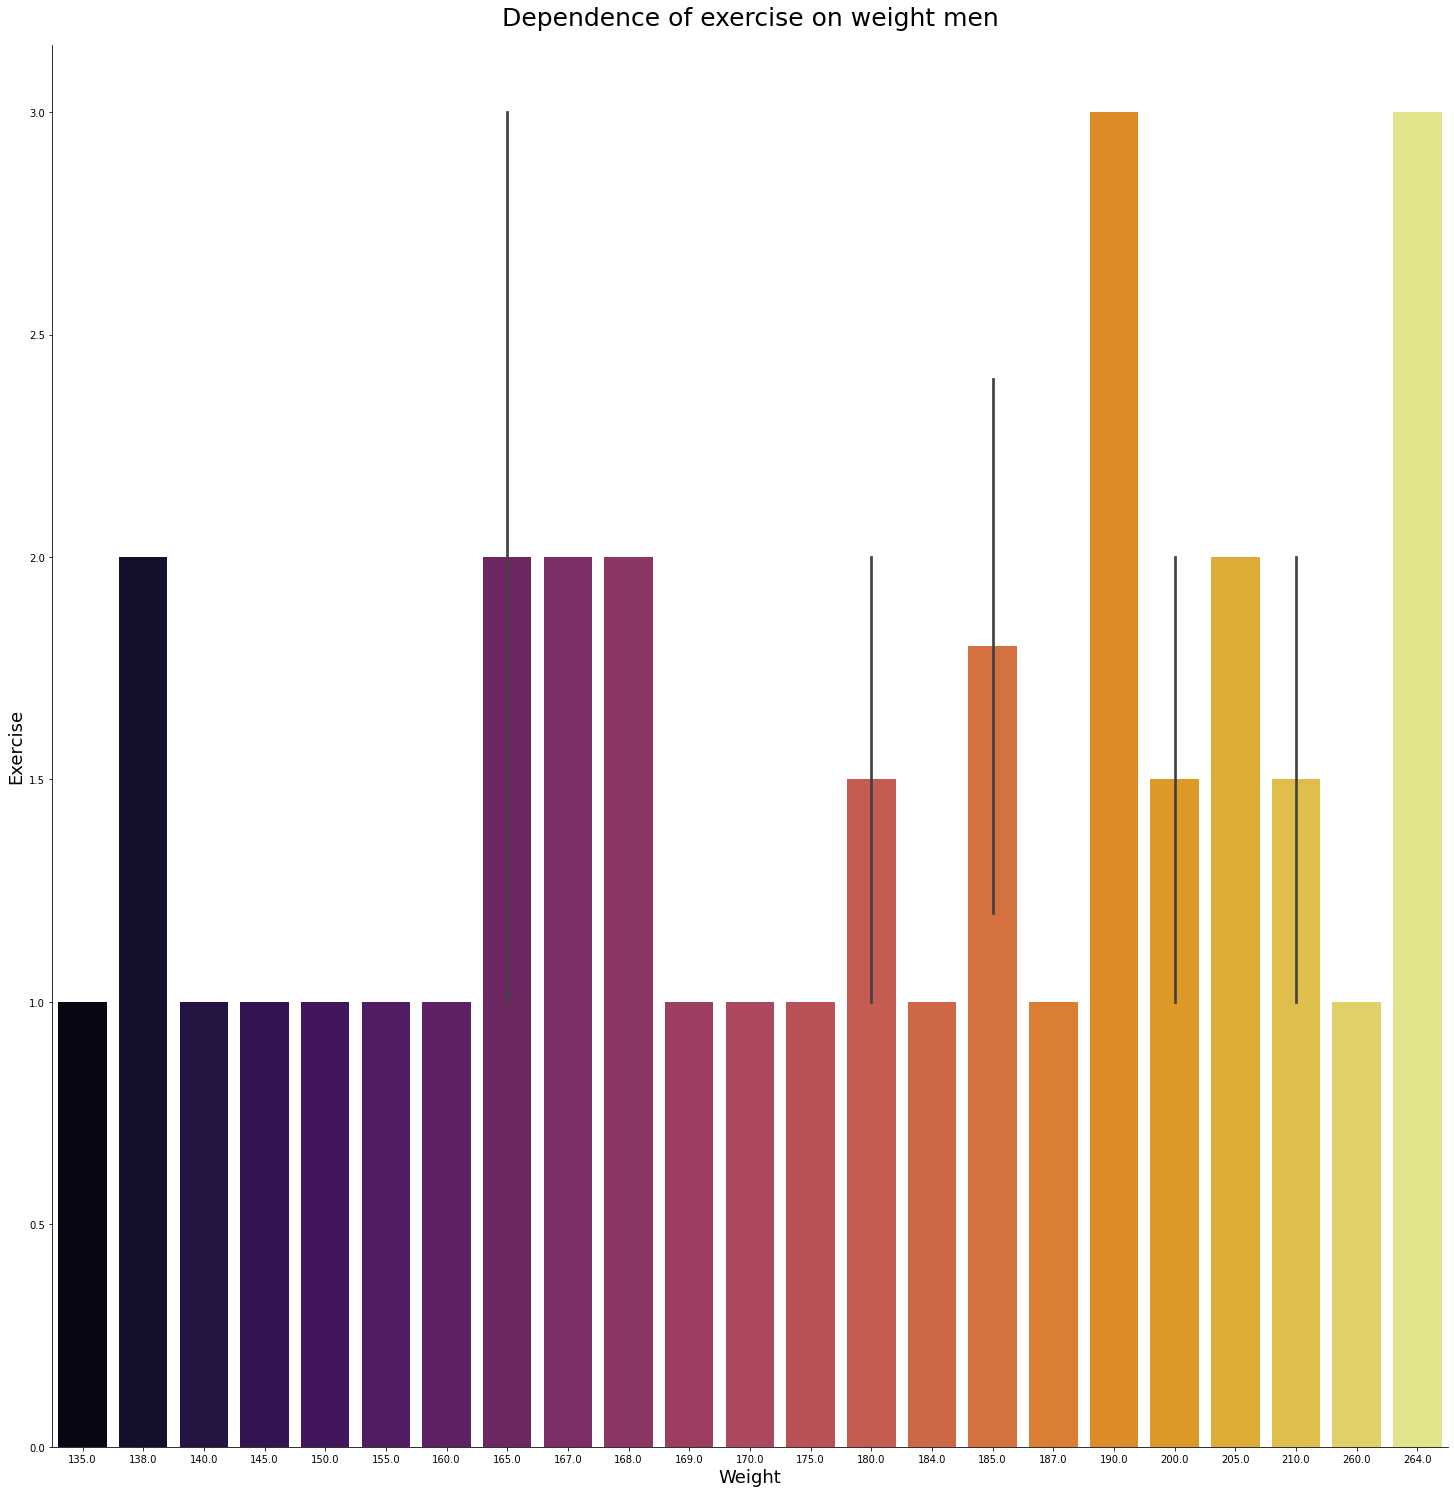

In [141]:
sns.factorplot(x='weight', y='exercise', data=men, 
               kind='bar', palette='inferno', size=20)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Exercise', fontsize=18)
plt.title('Dependence of exercise on weight men', y=1.01, size=25)

у мужчин аналогичная ситуация, как и у женщин.

#  Заключение
Таким образом, из данного анализа можно сделать вывод о том, что люди слишним весом очень обеспеченные, что позволяет не скупиться на пищу. В основном люди не принимают свой фактический веси не верят в это. Также, основным выводом можносказать, что практически все люди с лишним весом не женаты, а большинство из них - одиноки.